In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
src_table_1="data/raw/car_data.csv"
src_table_2="data/raw/CAR_DETAILS_FROM_CAR_DEKHO.csv"
src_table_3="data/raw/Car_details_v3.csv"

In [3]:
car_table_1 = pd.read_csv(src_table_1, delimiter=',')
car_table_2 = pd.read_csv(src_table_2, delimiter=',')
car_table_3 = pd.read_csv(src_table_3, delimiter=',')

## Изучим данные

In [4]:
print("Table 1")
print(car_table_1.head())
print("Table 2")
print(car_table_2.head())
print("\nTable 3")
print(car_table_3.head())

Table 1
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Table 2
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2    Datsun RediGO T Option  2017         250000      46000  Petrol   
3     Honda Amaze VX i-DTEC  2014         450000   

In [5]:
print("Table 1")
print(car_table_1.info())
print("\nTable 2")
print(car_table_2.info())
print("\nTable 3")
print(car_table_3.info())

Table 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       280 non-null    object 
 1   Year           280 non-null    int64  
 2   Selling_Price  280 non-null    float64
 3   Present_Price  280 non-null    float64
 4   Kms_Driven     280 non-null    int64  
 5   Fuel_Type      280 non-null    object 
 6   Seller_Type    280 non-null    object 
 7   Transmission   280 non-null    object 
 8   Owner          280 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 19.8+ KB
None

Table 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4036 entries, 0 to 4035
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4036 non-null   object
 1   year           4036 non-null   int64 
 2   selling_price  4036 non-null   int64 
 3   k

In [6]:
car_t_1_dupl = car_table_1.duplicated(keep=False)
e = car_t_1_dupl.sum()
e

4

In [7]:
t1_d_ind = car_t_1_dupl.loc[car_t_1_dupl].index
print(type(t1_d_ind))
#t1_d_ind.to_frame(index = False)
#t1_d_ind.to_series()
t1_d_ind_list = t1_d_ind.to_list()
print(t1_d_ind_list)
type(t1_d_ind_list)

<class 'pandas.core.indexes.base.Index'>
[15, 17, 49, 88]


list

In [8]:
for i in t1_d_ind_list:
    print(car_table_1.loc[i])

Car_Name         ertiga
Year               2016
Selling_Price      7.75
Present_Price     10.79
Kms_Driven        43000
Fuel_Type        Diesel
Seller_Type      Dealer
Transmission     Manual
Owner                 0
Name: 15, dtype: object
Car_Name         ertiga
Year               2016
Selling_Price      7.75
Present_Price     10.79
Kms_Driven        43000
Fuel_Type        Diesel
Seller_Type      Dealer
Transmission     Manual
Owner                 0
Name: 17, dtype: object
Car_Name          fortuner
Year                  2015
Selling_Price         23.0
Present_Price        30.61
Kms_Driven           40000
Fuel_Type           Diesel
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
Name: 49, dtype: object
Car_Name          fortuner
Year                  2015
Selling_Price         23.0
Present_Price        30.61
Kms_Driven           40000
Fuel_Type           Diesel
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
Name: 88, 

In [9]:
car_table_2.duplicated().sum()

667

In [10]:
car_table_3.duplicated().sum()

1062

## Удалим повторяющиеся значения

In [11]:
car_table_1.drop_duplicates(inplace=True, ignore_index=True)
car_table_2.drop_duplicates(inplace=True, ignore_index=True)
car_table_3.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
print("Table 1")
print(car_table_1.isnull().sum())
print("\nTable 2")
print(car_table_2.isnull().sum())
print("\nTable 3")
print(car_table_3.isnull().sum())

Table 1
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Table 2
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Table 3
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          191
engine           191
max_power        188
torque           192
seats            191
dtype: int64


Все три набора данных содержат такие параметры как: марка автомобиля, год выпуска автомобиля, выставленная цена продаваемого автомобиля, пробег автомобиля в километрах, тип топлива, тип продавца (дилер или индивидуальный собстенник), тип коробки передач и количество предыдущих владельцев.
Первый набор данных отличается наличием данных изначальной цены автомобиля из салона, а третий наличием данных о расходе топлива автомобилем и объеме двигателя. Третий набор также содержит данные не указанные в аннотации, такие как максимальная мощность, момент и число посадочных мест.
Первый набор содержит 280 записей и не имеет пустых полей.
Второй набор содержит 4036 записей и не имеет пустых полей.
Третий набор содержит 7559 записей, но в некоротых из них есть пропуски значений, таких как расход топлива, объём двигателя, максимальная мощность, момент, число посадочных мест. Пропуск каждого из значений не превышает 200, что составляет менее 3% от всех данных данного набора.

Приведём все 3 таблицы к единому формату для дальнейшего их  объединения в одну
Переименуем названия первой таблицы согласно типам названия таблиц 2 и 3

In [13]:
car_table_1 = car_table_1.rename(columns={'Car_Name': 'name', 'Year': 'year', 'Selling_Price': 'selling_price', 'Present_Price': 'present_price', 'Kms_Driven': 'km_driven', 'Fuel_Type' : 'fuel', 'Seller_Type' : 'seller_type', 'Transmission' : 'transmission',  'Owner' : 'owner'})
car_table_1.head(1)

,name,year,selling_price,present_price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [14]:
print("Table 1")
print(car_table_1.dtypes, end="\n\n")
print("Table 2")
print(car_table_2.dtypes, end="\n\n")
print("Table 3")
print(car_table_3.dtypes, end="\n\n")

Table 1
name              object
year               int64
selling_price    float64
present_price    float64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
dtype: object

Table 2
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

Table 3
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object



In [15]:
print("Table 1")
print(car_table_1.describe(), end="\n\n")
print("Table 2")
print(car_table_2.describe(), end="\n\n")
print("Table 3")
print(car_table_3.describe(), end="\n\n")

Table 1
              year  selling_price  present_price      km_driven       owner
count   278.000000     278.000000     278.000000     278.000000  278.000000
mean   2013.636691       4.541978       7.375755   36857.895683    0.043165
std       2.899213       4.783034       7.186268   39828.183345    0.251221
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.785000       1.050000   15000.000000    0.000000
50%    2014.000000       3.495000       6.250000   31515.500000    0.000000
75%    2016.000000       6.075000       9.900000   49000.000000    0.000000
max    2018.000000      33.000000      36.230000  500000.000000    3.000000

Table 2
              year  selling_price      km_driven
count  3369.000000   3.369000e+03    3369.000000
mean   2012.963787   4.715830e+05   68913.409023
std       4.269971   4.939631e+05   47533.176498
min    1992.000000   2.000000e+04       1.000000
25%    2010.000000   2.000000e+05   35299.000000
50%  

Значения цены в таблце 1 представлено в формате float а в таблицах 2 и 3 в формате int64. К тому же цены на автомобили колеблются в определённых пределах от минимальной цены до примерного значения максимальной цены. Исходя из порядка значений, цена в таблицах 2 и 3 представлена в рублях. Преведём цену в таблице 1 к тому же формату. Найдём коэффициент перевода, зная, что он является 10 в какой-то степени найдём эту степень, читая что средние значения цены во всех таблицах имеют одинаковый порядок, то есть первая значащая цифра имеет солжий разряд.
Среднее значение цены в таблице 1 примерно равно 4.62
Среднее значение цены в таблице 2 примерно равно 5e+05
Среднее значение цены в таблице 2 примерно равно 6.4e+05
Из этого следует, что все значения цены в таблице 1 нужно домножить на 10^5

In [16]:
car_table_1['selling_price'] = round(car_table_1['selling_price']*math.pow(10,5))
car_table_1['present_price'] = round(car_table_1['present_price']*math.pow(10,5))
#for row in car_table_1.itertuples():
    #print(row.selling_price)

In [17]:
car_table_1['selling_price'] = car_table_1['selling_price'].astype(np.int64)
car_table_1['present_price'] = car_table_1['present_price'].astype(np.int64)
print(car_table_1.info())
#for row in car_table_1.itertuples():
 #   print(row.selling_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           278 non-null    object
 1   year           278 non-null    int64 
 2   selling_price  278 non-null    int64 
 3   present_price  278 non-null    int64 
 4   km_driven      278 non-null    int64 
 5   fuel           278 non-null    object
 6   seller_type    278 non-null    object
 7   transmission   278 non-null    object
 8   owner          278 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 19.7+ KB
None


In [18]:
car_table_1.describe(include='O')

,name,fuel,seller_type,transmission
count,278,278,278,278
unique,94,3,2,2
top,city,Petrol,Dealer,Manual
freq,25,221,177,242


In [19]:
car_table_2.describe(include='O')

,name,fuel,seller_type,transmission,owner
count,3369,3369,3369,3369,3369
unique,1442,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,50,1686,2663,3071,2092


In [20]:
car_table_3.describe(include='O')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6497,6497,6497,6497,6497,6306,6306,6309,6305
unique,2009,4,3,2,5,390,121,317,438
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,107,3532,5824,5933,3992,195,863,311,444


Приведём значения столбца owner к единому формату данных (численный формат)

In [21]:
uv_owner_t1 = car_table_1['owner'].unique()
print(uv_owner_t1)
uv_owner_t2 = car_table_2['owner'].unique()
uv_owner_t2.sort()
print(uv_owner_t2)
uv_owner_t3 = car_table_3['owner'].unique()
uv_owner_t3.sort()
print(uv_owner_t3)

[0 1 3]
['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']
['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']


In [22]:
car_table_2['owner'] = car_table_2['owner'].replace(['Test Drive Car', 'First Owner', 'Second Owner', 
 'Third Owner','Fourth & Above Owner'],['0','1','2','3','4'])
uv_owner_t2 = car_table_2['owner'].unique()
uv_owner_t2.sort()
print(uv_owner_t2)

['0' '1' '2' '3' '4']


In [23]:
car_table_3['owner'] = car_table_3['owner'].replace(['Test Drive Car', 'First Owner', 'Second Owner', 
 'Third Owner','Fourth & Above Owner'],['0','1','2','3','4'])
uv_owner_t3 = car_table_3['owner'].unique()
uv_owner_t3.sort()
print(uv_owner_t3)

['0' '1' '2' '3' '4']


Скорректируем формат данных owner

In [24]:
car_table_2['owner'] = car_table_2['owner'].astype(np.int64)
car_table_3['owner'] = car_table_3['owner'].astype(np.int64)
print(car_table_1.info(),'\n')
print(car_table_2.info(),'\n')
print(car_table_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           278 non-null    object
 1   year           278 non-null    int64 
 2   selling_price  278 non-null    int64 
 3   present_price  278 non-null    int64 
 4   km_driven      278 non-null    int64 
 5   fuel           278 non-null    object
 6   seller_type    278 non-null    object
 7   transmission   278 non-null    object
 8   owner          278 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 19.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369 entries, 0 to 3368
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3369 non-null   object
 1   year           3369 non-null   int64 
 2   selling_price  3369 non-null   int64 
 3   km_driven      3369 non-null   int64 
 

## Объединим таблицы для дальнейшей работы с ними 

In [25]:
car_table = pd.concat([car_table_1,car_table_2,car_table_3],axis = 0)
print(car_table.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10144 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           10144 non-null  object 
 1   year           10144 non-null  int64  
 2   selling_price  10144 non-null  int64  
 3   present_price  278 non-null    float64
 4   km_driven      10144 non-null  int64  
 5   fuel           10144 non-null  object 
 6   seller_type    10144 non-null  object 
 7   transmission   10144 non-null  object 
 8   owner          10144 non-null  int64  
 9   mileage        6306 non-null   object 
 10  engine         6306 non-null   object 
 11  max_power      6309 non-null   object 
 12  torque         6305 non-null   object 
 13  seats          6306 non-null   float64
dtypes: float64(2), int64(4), object(8)
memory usage: 1.2+ MB
None


### Проверим данные на наличие повторяющихся и удалим найденные повторы

In [26]:
car_table.duplicated().sum()

2

In [27]:
car_table.drop_duplicates(inplace=True, ignore_index=True)

### Преобразуем данные типа object в строковые значения для более удобной дальнейшей работы с данными

In [28]:
#car_table.convert_dtypes().dtypes  # Строковые значения теперь представлены типом string, а не object
car_table = car_table.convert_dtypes()

In [29]:
car_table.dtypes

name             string[python]
year                      Int64
selling_price             Int64
present_price             Int64
km_driven                 Int64
fuel             string[python]
seller_type      string[python]
transmission     string[python]
owner                     Int64
mileage          string[python]
engine           string[python]
max_power        string[python]
torque           string[python]
seats                     Int64
dtype: object

In [30]:
car_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10142 entries, 0 to 10141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10142 non-null  string
 1   year           10142 non-null  Int64 
 2   selling_price  10142 non-null  Int64 
 3   present_price  278 non-null    Int64 
 4   km_driven      10142 non-null  Int64 
 5   fuel           10142 non-null  string
 6   seller_type    10142 non-null  string
 7   transmission   10142 non-null  string
 8   owner          10142 non-null  Int64 
 9   mileage        6306 non-null   string
 10  engine         6306 non-null   string
 11  max_power      6309 non-null   string
 12  torque         6305 non-null   string
 13  seats          6306 non-null   Int64 
dtypes: Int64(6), string(8)
memory usage: 1.1 MB


### Избавимся от дублирования индексов 

In [31]:
car_table.loc[2]

name               ciaz
year               2017
selling_price    725000
present_price    985000
km_driven          6900
fuel             Petrol
seller_type      Dealer
transmission     Manual
owner                 0
mileage            <NA>
engine             <NA>
max_power          <NA>
torque             <NA>
seats              <NA>
Name: 2, dtype: object

In [32]:
car_table.reset_index(inplace=True)
car_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10142 entries, 0 to 10141
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          10142 non-null  int64 
 1   name           10142 non-null  string
 2   year           10142 non-null  Int64 
 3   selling_price  10142 non-null  Int64 
 4   present_price  278 non-null    Int64 
 5   km_driven      10142 non-null  Int64 
 6   fuel           10142 non-null  string
 7   seller_type    10142 non-null  string
 8   transmission   10142 non-null  string
 9   owner          10142 non-null  Int64 
 10  mileage        6306 non-null   string
 11  engine         6306 non-null   string
 12  max_power      6309 non-null   string
 13  torque         6305 non-null   string
 14  seats          6306 non-null   Int64 
dtypes: Int64(6), int64(1), string(8)
memory usage: 1.2 MB


In [33]:
car_table.drop(columns='index', inplace = True)
car_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10142 entries, 0 to 10141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10142 non-null  string
 1   year           10142 non-null  Int64 
 2   selling_price  10142 non-null  Int64 
 3   present_price  278 non-null    Int64 
 4   km_driven      10142 non-null  Int64 
 5   fuel           10142 non-null  string
 6   seller_type    10142 non-null  string
 7   transmission   10142 non-null  string
 8   owner          10142 non-null  Int64 
 9   mileage        6306 non-null   string
 10  engine         6306 non-null   string
 11  max_power      6309 non-null   string
 12  torque         6305 non-null   string
 13  seats          6306 non-null   Int64 
dtypes: Int64(6), string(8)
memory usage: 1.1 MB


### Проверим данные на наличие пустых строк

In [34]:
car_table_numb_null = car_table.isnull().sum()
print(car_table_numb_null)

name                0
year                0
selling_price       0
present_price    9864
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage          3836
engine           3836
max_power        3833
torque           3837
seats            3836
dtype: int64


In [35]:
car_table['name'].size

10142

Весь набор данных содержит 10144 записей. Некоторые из них заполнены не полностью. Имеются пропуски в категориях: изначальная цена автомобиля из салона (present_price) 9866, расход топлива 3838, объём двигателя 3838, максимальная мощность 3835, момент 3839, число посадочных мест 3838. 

In [36]:
#car_table.to_csv('car_table_clear.csv', index=False) 

In [37]:
print('present_price - ', car_table_numb_null['present_price']/car_table['name'].size*100, '%')
print('mileage - ',car_table_numb_null['mileage']/car_table['name'].size*100, '%')
print('engine - ',car_table_numb_null['engine']/car_table['name'].size*100, '%')
print('max_power - ',car_table_numb_null['max_power']/car_table['name'].size*100, '%')
print('torque - ',car_table_numb_null['torque']/car_table['name'].size*100, '%')
print('seats - ',car_table_numb_null['seats']/car_table['name'].size*100, '%')

present_price -  97.25892328929206 %
mileage -  37.822914612502466 %
engine -  37.822914612502466 %
max_power -  37.79333464799842 %
torque -  37.832774600670476 %
seats -  37.822914612502466 %


Пропуск каждого из значения изначальной цены автомобиля из салона больше 50% около 97%, что не позволяет заполнить пропуски и следовательно не позволяет использовать как признак для определния цены автомобиля в данном наборе данных. Убираем данный столбец. 

In [38]:
car_table = car_table.drop('present_price', axis=1)

Пропуск каждого из остальных значений не более 38%, что позволяет теоретически использовать их как признаки для определния цены автомобиля в данном наборе данных и заполнить пропуски в данных например статичстически.

## Исследуем зависимость цены на автомобиль от марки

In [39]:
car_name = car_table.groupby('name').agg({'selling_price' : ['mean', 'max', 'min', 'count']}).reset_index()
car_name = car_name.sort_values(by = ('selling_price', 'mean'), ascending = False)
car_name

name selling_price  \
                                                                 mean   
2507                      Volvo XC90 T8 Excellence BSIV    10000000.0   
1804  Mercedes-Benz S-Class S 350d Connoisseurs Edition     8150000.0   
77                                BMW X7 xDrive 30d DPE     7200000.0   
25                               Audi A6 35 TFSI Matrix     6223000.0   
1803                    Mercedes-Benz S-Class S 350 CDI     5925000.0   
...                                                 ...           ...   
430                                  Hero  Ignitor Disc       20000.0   
427                               Ford Ikon 1.6 ZXI NXt       20000.0   
429                                    Hero  CBZ Xtreme       20000.0   
78                                        Bajaj  ct 100       18000.0   
85                                   Bajaj Discover 125       17500.0   

                                
           max       min count  
2507  10000000  10000000     1  
1804   8150000   8150000     1  
77     7200000   7200000     1  
25     6523000   5923000     3  
1803   6000000   5850000     2  
...        ...       ...   ...  
430      20000     20000     1  
427      20000     20000     1  
429      20000     20000     1  
78       18000     18000     1  
85       20000     15000     2  

[2548 rows x 5 columns]

In [40]:
car_name['name'].size

2548

In [41]:
car_name = car_name.sort_values(by='name',ascending=True)
car_name

name  selling_price                      
                                                  mean     max     min count
0                             Activa 3g        31000.0   45000   17000     2
1                             Activa 4g        40000.0   40000   40000     1
2        Ambassador CLASSIC 1500 DSL AC        97500.0  120000   75000     2
3     Ambassador Classic 2000 DSZ AC PS        99000.0   99000   99000     1
4           Ambassador Classic 2000 Dsz        50000.0   50000   50000     1
...                                 ...            ...     ...     ...   ...
2543                                sx4  315833.333333  475000  195000     6
2544                              verna  610785.714286  925000  450000    14
2545                      vitara brezza       925000.0  925000  925000     1
2546                            wagon r       251250.0  325000  105000     4
2547                              xcent       575000.0  575000  575000     1

[2548 rows x 5 columns]

Будем считать, что первые 2 слова являются сочетание марки и модели автомобиля, что достаточно может являтся обобщающими параметрами цены на автомобиль, поэтому если имя автомобиля имеет больше чем 2 слова удалим все последующие слова.

In [42]:
def word_list(line):
    words = line.split()
    return words
def words(line, word_numb = 1, start_position = 0):
    words = line.split()
    return ' '.join(words[start_position : (start_position + word_numb)])

Создадим таблицу брендов

In [43]:
car_table['brand'] = car_table['name'].apply(words, word_numb = 1)
car_brand = car_table.groupby('brand').agg({'selling_price' : ['mean', 'max', 'min', 'count']}).reset_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also вывод большего числа строк
    print(car_brand)

            brand   selling_price                         
                             mean       max      min count
0          Activa         34000.0     45000    17000     3
1      Ambassador   156571.428571    430000    50000     7
2           Ashok        300000.0    300000   300000     1
3            Audi  2261783.283333   6523000   650000    60
4             BMW  2610070.422535   7200000   480000    71
5           Bajaj         52800.0    145000    10000    25
6       Chevrolet   256350.460641   1295000    45000   343
7          Daewoo         72750.0    100000    45000     4
8          Datsun   310585.304878    590000   150000    82
9            Fiat   278579.666667    700000    70000    69
10          Force        742200.0   1050000   346000     5
11           Ford   527219.338208   3250000    20000   547
12           Hero         36200.0     65000    20000    15
13          Honda   544540.307018   2125000    12000   570
14        Hyosung        135000.0    135000   135000    

Всего 72 значения для брендов 

Проверим качество определения брендов

In [44]:
Activa = car_name[car_name['name'].str.contains('Activa', case=False)]
Activa

name selling_price                    
                               mean    max    min count
0           Activa 3g       31000.0  45000  17000     2
1           Activa 4g       40000.0  40000  40000     1
448  Honda Activa 125       35000.0  35000  35000     1
449   Honda Activa 4G       46500.0  48000  45000     2

Как видно Activa это не бренд, а модель автомобиля, заменим

In [45]:
car_table['brand'] = car_table['brand'].replace(['Activa'],['Honda'])

In [46]:
Ambassador = car_name[car_name['name'].str.contains('Ambassador', case=False)]
Ambassador

name selling_price                      
                                                 mean     max     min count
2        Ambassador CLASSIC 1500 DSL AC       97500.0  120000   75000     2
3     Ambassador Classic 2000 DSZ AC PS       99000.0   99000   99000     1
4           Ambassador Classic 2000 Dsz       50000.0   50000   50000     1
5       Ambassador Grand 1500 DSZ BSIII      122000.0  122000  122000     1
6  Ambassador Grand 1800 ISZ MPFI PW CL      430000.0  430000  430000     1
7       Ambassador Grand 2000 DSZ PW CL      200000.0  200000  200000     1

Из интернета Ambassador имеет бренд Hindustan

In [47]:
car_table['brand'] = car_table['brand'].replace(['Ambassador'],['Hindustan'])

Из интернета Ashok, Audi, BMW, Bajaj, Chevrolet, Daewoo, Datsun, Fiat, Force, Ford, Honda, Hyosung, Hyundai, Isuzu, Jaguar, Jeep, KTM, Kia - являются брендами

Hero это модель марки Dongfeng

In [48]:
car_table['brand'] = car_table['brand'].replace(['Hero'],['Dongfeng'])

In [49]:
Land = car_name[car_name['name'].str.contains('Land', case=False)]
Land

name selling_price           \
                                                              mean      max   
8                             Ashok Leyland Stile LE      300000.0   300000   
1020                  Land Rover Discovery S 2.0 SD4     4000000.0  4000000   
1021       Land Rover Discovery Sport SD4 HSE Luxury     3500000.0  3500000   
1022           Land Rover Discovery Sport TD4 HSE 7S     4000000.0  4000000   
1023               Land Rover Discovery Sport TD4 SE     4500000.0  4500000   
1024                 Land Rover Freelander 2 TD4 HSE     1650000.0  1650000   
1025  Land Rover Range Rover 4.4 Diesel LWB Vogue SE     4200000.0  4200000   
1026      Land Rover Range Rover Evoque 2.2L Dynamic     2349000.0  2349000   
1027         Land Rover Range Rover Evoque 2.2L Pure     2000000.0  2000000   
1809                        Mitsubishi Outlander 2.4      525000.0   525000   
2401                  Toyota Land Cruiser Prado VX L     3500000.0  3500000   

                     
          min count  
8      300000     1  
1020  4000000     1  
1021  3500000     1  
1022  4000000     1  
1023  4500000     1  
1024  1650000     1  
1025  4200000     1  
1026  2349000     1  
1027  2000000     1  
1809   525000     1  
2401  3500000     1

Land это марка Land Rover

In [50]:
car_table['brand'] = car_table['brand'].replace(['Land'],['Land Rover'])

Lexus — это престижный японский бренд автомобилей, принадлежащий компании Toyota. Он известен своим высоким качеством, роскошным дизайном, передовыми технологиями и комфортом.
Поэтому оставляем его как есть.

MG, Mahindra, Mercedes-Benz, Mitsubishi, Nissan, Opel, Peugeot, Renault, Skoda, Suzuki, TVS, Tata, Toyota, UM, Volkswagen, Volvo, Yamaha  - являются брендами
Maruti является брендом поглащённым компанией Suzuki, поэтому заменим на Suzuki
OpelCorsa является ошибочным слитным написанием бредаи модели заменим на бренд
Royal это марка Royal Enfield

In [51]:
car_table['brand'] = car_table['brand'].replace(['Maruti'],['Suzuki'])
car_table['brand'] = car_table['brand'].replace(['OpelCorsa'],['Opel'])
car_table['brand'] = car_table['brand'].replace(['Royal'],['Royal Enfield'])

In [52]:
alto = car_name[car_name['name'].str.contains('alto', case=False)]
alto.head()

name selling_price                        
                                                mean      max      min count
1030      MG Hector Sharp DCT Dualtone     1900000.0  1900000  1900000     1
1329              Maruti Alto 800 Base      195000.0   250000   155000     7
1330           Maruti Alto 800 CNG LXI      171000.0   178000   165000     3
1331  Maruti Alto 800 CNG LXI Optional      315000.0   330000   300000     2
1332                Maruti Alto 800 LX      233500.0   290000   160000     8

alto это модель бренда Maruti

In [53]:
car_table['brand'] = car_table['brand'].replace(['alto'],['Maruti'])

In [54]:
amaze = car_name[car_name['name'].str.contains('amaze', case=False)]
amaze.head()

name  selling_price                      
                                               mean     max     min count
450  Honda Amaze Anniversary Edition       509999.0  509999  509999     1
451        Honda Amaze E Diesel BSIV       465000.0  465000  465000     1
452      Honda Amaze E Option i-DTEC       550000.0  550000  550000     1
453             Honda Amaze E i-DTEC  461666.666667  515000  370000     3
454            Honda Amaze E i-Dtech       392500.0  500000  300000     4

amaze это автомобиль от Honda
baleno от Suzuki    
brio от Honda
camry от Toyota
ciaz от Suzuki 

In [55]:
city = car_name[car_name['name'].str.contains("city", case=False)]
city

name  selling_price                        
                                     mean      max      min count
514      Honda City 1.3 DX       120000.0   120000   120000     1
515     Honda City 1.3 EXI   98333.333333   145000    50000     6
516    Honda City 1.5 E MT      357499.75   450000   229999     4
517     Honda City 1.5 EXI  110166.666667   180000    75000     6
518   Honda City 1.5 EXI S       105000.0   105000   105000     1
...                    ...            ...      ...      ...   ...
570   Honda City i-VTEC SV       690000.0   690000   690000     1
571    Honda City i-VTEC V       637000.0   949000   325000     2
572   Honda City i-VTEC VX      1046000.0  1180000   950000     5
573   Honda City i-VTEC ZX      1200000.0  1200000  1200000     1
2520                  city       751600.0  1150000   210000    25

[61 rows x 5 columns]

city от Honda

In [56]:
car_table['brand'] = car_table['brand'].replace(['amaze','baleno', 'brio', 'camry', 'ciaz', 'city'],
                                               ['Honda','Suzuki','Honda','Toyota', 'Suzuki', 'Honda'])

corolla от Toyota
creta от Hyundai
dzire от Suzuki 
elantra от Hyundai
eon от Hyundai
ertiga от Suzuki 
etios от Toyota
fortuner от Toyota

In [57]:
car_table['brand'] = car_table['brand'].replace(['corolla','creta', 'dzire', 'elantra', 'eon', 'ertiga', 'etios', 'fortuner'],
                                               ['Toyota','Hyundai','Suzuki','Hyundai','Hyundai', 'Suzuki','Toyota','Toyota'])

In [58]:
grand = car_name[car_name['name'].str.contains("grand", case=False)]
grand.head()

name selling_price                  \
                                                     mean     max     min   
5           Ambassador Grand 1500 DSZ BSIII      122000.0  122000  122000   
6      Ambassador Grand 1800 ISZ MPFI PW CL      430000.0  430000  430000   
7           Ambassador Grand 2000 DSZ PW CL      200000.0  200000  200000   
225  Fiat Grande Punto 1.3 Dynamic (Diesel)      221250.0  300000  150000   
226  Fiat Grande Punto 1.3 Emotion (Diesel)     268749.75  300000  220000   

           
    count  
5       1  
6       1  
7       1  
225     4  
226     4

grand от Hyundai 
i10 от Hyundai
i20 от Hyundai
ignis от Suzuki
innova от Toyota
jazz от Honda
omni от Suzuki 
ritz от Suzuki

In [59]:
car_table['brand'] = car_table['brand'].replace(['grand',   'i10',  'i20',   'ignis', 'innova', 'jazz', 'omni', 'ritz'],
                                               ['Hyundai','Hyundai','Hyundai','Suzuki','Toyota','Honda','Suzuki', 'Suzuki'])

In [60]:
s = car_name[car_name['name'].str.contains('s', case=False)]
s

name  selling_price                  \
                                                     mean     max     min   
2           Ambassador CLASSIC 1500 DSL AC        97500.0  120000   75000   
3        Ambassador Classic 2000 DSZ AC PS        99000.0   99000   99000   
4              Ambassador Classic 2000 Dsz        50000.0   50000   50000   
5          Ambassador Grand 1500 DSZ BSIII       122000.0  122000  122000   
6     Ambassador Grand 1800 ISZ MPFI PW CL       430000.0  430000  430000   
...                                    ...            ...     ...     ...   
2531                            etios liva       370000.0  475000  265000   
2536                                 ignis       490000.0  490000  490000   
2541                               s cross       650000.0  650000  650000   
2542                                 swift       454000.0  600000  300000   
2543                                   sx4  315833.333333  475000  195000   

            
     count  
2        2  
3        1  
4        1  
5        1  
6        1  
...    ...  
2531     4  
2536     1  
2541     1  
2542     5  
2543     6  

[1858 rows x 5 columns]

бренд модели s нельзя пока однозначено определить

In [61]:
car_brand_mark = car_table['name'].apply(words, word_numb = 2)
s = car_brand_mark.str.contains('s', case=False)
car_brand_mark[s == True]

1                   sx4
4                 swift
7               s cross
18                  sx4
20                ignis
              ...      
10126    Ford Freestyle
10128      Toyota Etios
10129    Ford Freestyle
10136    Hyundai Santro
10141      Maruti Swift
Name: name, Length: 3026, dtype: object

Значение s в обозначении автомобиля s cross
Из интернета s-cross имеет бренд suzuki

In [62]:
car_table['brand'] = car_table['brand'].replace(['s'],['Suzuki'])

In [63]:
swift = car_name[car_name['name'].str.contains('swift', case=False)]
swift

name selling_price                      
                                                 mean     max     min count
1574               Maruti Swift 1.2 DLX      272000.0  351000  217000     4
1575  Maruti Swift 1.2 DLX (Only Delhi)      375000.0  375000  375000     1
1576               Maruti Swift 1.3 DLX      270000.0  270000  270000     1
1577               Maruti Swift 1.3 LXI      136600.0  250000   73000     5
1578           Maruti Swift 1.3 VXI ABS      285000.0  475000   95000     2
...                                 ...           ...     ...     ...   ...
1670             Maruti Swift ZXI BSIII      120000.0  120000  120000     1
1671              Maruti Swift ZXI BSIV      700000.0  730000  670000     2
1672              Maruti Swift ZXI Plus      628600.0  720000  550000     5
1673              Maruti Swift ZXi BSIV      550000.0  550000  550000     1
2542                              swift      454000.0  600000  300000     5

[101 rows x 5 columns]

In [64]:
car_table['brand'] = car_table['brand'].replace(['swift'],['Maruti'])

sx4 от Suzuki
verna от Hyundai
vitara от Suzuki
xcent от Hyundai

In [65]:
car_table['brand'] = car_table['brand'].replace(['sx4',  'verna',  'vitara',   'xcent'],
                                               ['Suzuki','Hyundai','Suzuki','Hyundai'])

In [66]:
wagon = car_name[car_name['name'].str.contains('wagon', case=False)]
wagon.head()

name  selling_price                      
                                              mean     max     min count
1686         Maruti Wagon R AMT VXI  402090.909091  448000  300000    11
1687  Maruti Wagon R AMT VXI Option  450666.333333  509999  370000     3
1688    Maruti Wagon R AMT VXI Plus       475000.0  475000  475000     1
1689              Maruti Wagon R AX       187500.0  300000   75000     2
1690        Maruti Wagon R AX BSIII       100000.0  100000  100000     1

wagon от Maruti

In [67]:
car_table['brand'] = car_table['brand'].replace(['wagon'],['Maruti'])

Компаией Maruti владее компания Suzuki

In [68]:
car_table['brand'] = car_table['brand'].replace(['Maruti'],['Suzuki'])

In [69]:
car_brand = car_table.groupby('brand').agg({'selling_price' : ['mean', 'max', 'min', 'count', 'std']}).reset_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also вывод большего числа строк
    print(car_brand)

            brand   selling_price                                         
                             mean       max      min count             std
0           Ashok        300000.0    300000   300000     1            <NA>
1            Audi  2261783.283333   6523000   650000    60  1250821.920938
2             BMW  2610070.422535   7200000   480000    71  1706037.701174
3           Bajaj         52800.0    145000    10000    25     30751.69372
4       Chevrolet   256350.460641   1295000    45000   343   164540.565506
5          Daewoo         72750.0    100000    45000     4    24837.807203
6          Datsun   310585.304878    590000   150000    82    84935.839132
7        Dongfeng         36200.0     65000    20000    15    14173.415759
8            Fiat   278579.666667    700000    70000    69   133764.749108
9           Force        742200.0   1050000   346000     5   285716.992844
10           Ford   527219.338208   3250000    20000   547   418478.589669
11      Hindustan   15657

Осталось 39 марок автомобилей, для обучения это большое число значений

Преобразуем и отсортируем по возрастанию цены данные и обновим индексы после сортировки

In [70]:
car_brand = car_table.groupby('brand').agg({'selling_price' : ['mean', 'max', 'min', 'count', 'std', 'median']}).reset_index()
car_brand = car_brand.rename(columns={'selling_price' : 'sell_pr'})
car_brand.columns = car_brand.columns.map('_'.join)
car_brand = car_brand.rename(columns={'brand_' : 'brand'})
car_brand = car_brand.sort_values(by=['sell_pr_mean','sell_pr_count'],ascending=False).reset_index()
car_brand.drop(columns='index', inplace = True)

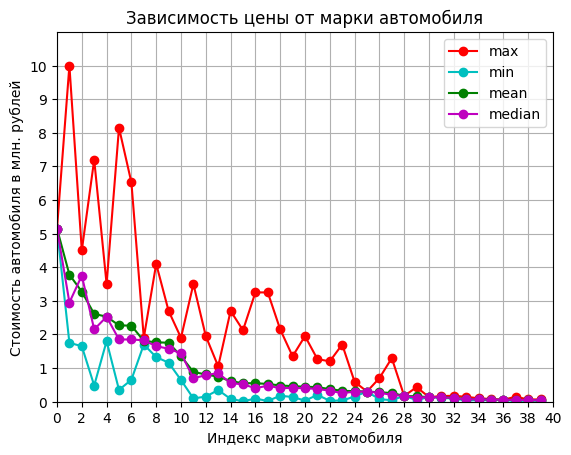

In [71]:
fig, ax = plt.subplots()
ax.plot(car_brand.index.to_series(),car_brand['sell_pr_max'], color='r', marker='o', markersize=6)
ax.plot(car_brand.index.to_series(),car_brand['sell_pr_min'], color='c', marker='o', markersize=6)
ax.plot(car_brand.index.to_series(),car_brand['sell_pr_mean'], color='g', marker='o', markersize=6)
ax.plot(car_brand.index.to_series(),car_brand['sell_pr_median'], color='m', marker='o', markersize=6)
plt.xlabel('Индекс марки автомобиля') #Подпись для оси х
plt.ylabel('Стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.title('Зависимость цены от марки автомобиля') #Название
ax.set(xlim=(0, 40), xticks=np.arange(0, 41, 2),
    ylim=(0, 11*math.pow(10,6)), yticks=np.arange(0, 11)*math.pow(10,6),
       yticklabels=np.arange(0, 11))
ax.legend(['max', 'min', 'mean', 'median'])
ax.grid()
plt.show()

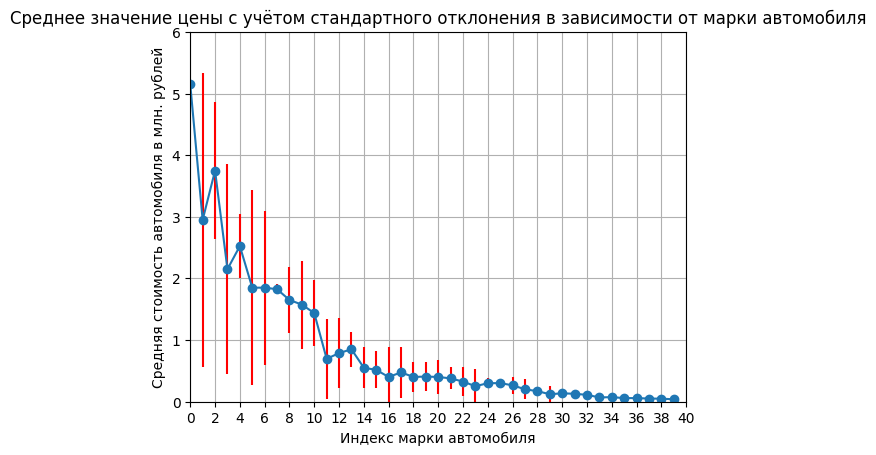

In [72]:
car_brand['sell_pr_std'] = car_brand['sell_pr_std'].fillna(0)
fig, ax = plt.subplots()
ax.errorbar(car_brand.index.to_series(), car_brand['sell_pr_median'], xerr=0, yerr=car_brand['sell_pr_std'], fmt='o-', ecolor='red')
plt.title('Среднее значение цены с учётом стандартного отклонения в зависимости от марки автомобиля')
plt.xlabel('Индекс марки автомобиля') #Подпись для оси х
plt.ylabel('Средняя стоимость автомобиля в млн. рублей') #Подпись для оси y
ax.grid()
ax.set(xlim=(0, 40), xticks=np.arange(0, 41, 2),
    ylim=(0, 6*math.pow(10,6)), yticks=np.arange(0, 7)*math.pow(10,6),
       yticklabels=np.arange(0, 7))
plt.show()

Из графика видно, что существуют марки дорогоих и дешёвых автомобилей

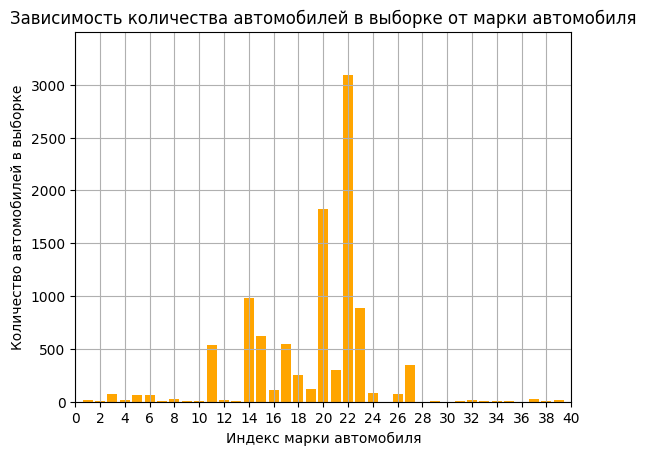

In [73]:
fig, ax = plt.subplots()
ax.bar(car_brand.index.to_series(),car_brand['sell_pr_count'], color='orange')
plt.xlabel('Индекс марки автомобиля') #Подпись для оси х
plt.ylabel('Количество автомобилей в выборке') #Подпись для оси y
plt.title('Зависимость количества автомобилей в выборке от марки автомобиля') #Название
ax.set(xlim=(0, 40), xticks=np.arange(0, 41, 2),
    ylim=(0, 3500), yticks=np.arange(0, 35, 5)*math.pow(10,2))
ax.grid()
plt.show()

Также существует примерно 7 марок с наибольшим числом автомобилей в выборке
Уменьшим число марок автомобиля, для получения приемлемого числа для обучения модели

Также по результатам графиков среди марок можно выделить примерные 4 группы для объединени: 0-6, 7-10, 11-23, 24-39

Данные отсортированы по цене 

In [74]:
car_brand = car_brand.sort_values(by=['sell_pr_mean','sell_pr_count'],ascending=False)
car_brand

,brand,sell_pr_mean,sell_pr_max,sell_pr_min,sell_pr_count,sell_pr_std,sell_pr_median
0,Lexus,5150000.0,5150000,5150000,1,0.0,5150000.0
1,Volvo,3779166.666667,10000000,1750000,12,2383771.680393,2950000.0
2,Land Rover,3274875.0,4500000,1650000,8,1107239.222765,3750000.0
3,BMW,2610070.422535,7200000,480000,71,1706037.701174,2150000.0
4,Jaguar,2529249.916667,3500000,1800000,12,524283.526565,2525000.0
5,Mercedes-Benz,2268772.727273,8150000,350000,66,1578770.337421,1850000.0
6,Audi,2261783.283333,6523000,650000,60,1250821.920938,1850000.0
7,MG,1807000.0,1900000,1700000,5,81363.382427,1825000.0
8,Jeep,1766791.625,4100000,1325000,24,539821.95583,1650000.0
9,Isuzu,1752500.0,2700000,1160000,4,712524.853368,1575000.0


In [75]:
car_brand.tail(18)

,brand,sell_pr_mean,sell_pr_max,sell_pr_min,sell_pr_count,sell_pr_std,sell_pr_median
22,Suzuki,371910.83053,1200000,25000,3092,229954.674362,325000.0
23,Tata,323194.388764,1700000,35000,890,275286.227107,250000.0
24,Datsun,310585.304878,590000,150000,82,84935.839132,300000.0
25,Ashok,300000.0,300000,300000,1,0.0,300000.0
26,Fiat,278579.666667,700000,70000,69,133764.749108,265000.0
27,Chevrolet,256350.460641,1295000,45000,343,164540.565506,200000.0
28,UM,170000.0,170000,170000,1,0.0,170000.0
29,Hindustan,156571.428571,430000,50000,7,129426.758108,120000.0
30,Hyosung,135000.0,135000,135000,1,0.0,135000.0
31,KTM,133750.0,165000,115000,4,22500.0,127500.0


In [76]:
print(car_brand['brand'].to_list())

['Lexus', 'Volvo', 'Land Rover', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Audi', 'MG', 'Jeep', 'Isuzu', 'Kia', 'Toyota', 'Mitsubishi', 'Force', 'Mahindra', 'Honda', 'Skoda', 'Ford', 'Volkswagen', 'Nissan', 'Hyundai', 'Renault', 'Suzuki', 'Tata', 'Datsun', 'Ashok', 'Fiat', 'Chevrolet', 'UM', 'Hindustan', 'Hyosung', 'KTM', 'Royal Enfield', 'Opel', 'Daewoo', 'Yamaha', 'Peugeot', 'Bajaj', 'TVS', 'Dongfeng']


Объединим последнии 16 марок в одну и назовём её Chevrolet, так как их цены находятся примерно в одном диапазоне

In [77]:
car_table['brand'] = car_table['brand'].replace(['Datsun', 'Ashok', 'Fiat', 'Chevrolet', 'UM', 'Hindustan', 'Hyosung', 'KTM', 'Royal Enfield', 'Opel', 'Daewoo', 'Yamaha', 'Peugeot', 'Bajaj', 'TVS', 'Dongfeng'],'Chevrolet')

In [78]:
car_brand.head(15)

,brand,sell_pr_mean,sell_pr_max,sell_pr_min,sell_pr_count,sell_pr_std,sell_pr_median
0,Lexus,5150000.0,5150000,5150000,1,0.0,5150000.0
1,Volvo,3779166.666667,10000000,1750000,12,2383771.680393,2950000.0
2,Land Rover,3274875.0,4500000,1650000,8,1107239.222765,3750000.0
3,BMW,2610070.422535,7200000,480000,71,1706037.701174,2150000.0
4,Jaguar,2529249.916667,3500000,1800000,12,524283.526565,2525000.0
5,Mercedes-Benz,2268772.727273,8150000,350000,66,1578770.337421,1850000.0
6,Audi,2261783.283333,6523000,650000,60,1250821.920938,1850000.0
7,MG,1807000.0,1900000,1700000,5,81363.382427,1825000.0
8,Jeep,1766791.625,4100000,1325000,24,539821.95583,1650000.0
9,Isuzu,1752500.0,2700000,1160000,4,712524.853368,1575000.0


Обединим первые 6 марок в одну и назовём её BMW, так как их цены находятся примерно в одном диапазоне

In [79]:
car_table['brand'] = car_table['brand'].replace(['Lexus', 'Volvo', 'Land Rover', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Audi'],'BMW')

In [80]:
car_brand.iloc[6:24]

,brand,sell_pr_mean,sell_pr_max,sell_pr_min,sell_pr_count,sell_pr_std,sell_pr_median
6,Audi,2261783.283333,6523000,650000,60,1250821.920938,1850000.0
7,MG,1807000.0,1900000,1700000,5,81363.382427,1825000.0
8,Jeep,1766791.625,4100000,1325000,24,539821.95583,1650000.0
9,Isuzu,1752500.0,2700000,1160000,4,712524.853368,1575000.0
10,Kia,1354500.0,1900000,643000,4,533976.591247,1437500.0
11,Toyota,884213.831144,3500000,95000,533,650745.268319,695000.0
12,Mitsubishi,808214.285714,1950000,150000,14,572342.041168,787500.0
13,Force,742200.0,1050000,346000,5,285716.992844,850000.0
14,Mahindra,610463.846389,2700000,80000,983,328786.867804,550000.0
15,Honda,548513.691438,2125000,12000,619,300614.400113,515000.0


Объединим марки с 7 по 23 и назовём её Suzuki	

In [81]:
car_table['brand'] = car_table['brand'].replace(['MG', 'Jeep', 'Isuzu', 'Kia', 'Toyota', 'Mitsubishi', 'Force', 'Mahindra', 'Honda', 'Skoda', 'Ford', 'Volkswagen', 'Nissan', 'Hyundai', 'Renault', 'Suzuki', 'Tata'],'Suzuki')

Обновим таблицу после слияния

In [82]:
car_brand = car_table.groupby('brand').agg({'selling_price' : ['mean', 'max', 'min', 'count', 'std', 'median']}).reset_index()
car_brand = car_brand.rename(columns={'selling_price' : 'sell_pr'})
car_brand.columns = car_brand.columns.map('_'.join)
car_brand = car_brand.rename(columns={'brand_' : 'brand'})
car_brand = car_brand.sort_values(by=['sell_pr_mean','sell_pr_count'],ascending=False).reset_index()
car_brand.drop(columns='index', inplace = True)

In [83]:
car_brand

,brand,sell_pr_mean,sell_pr_max,sell_pr_min,sell_pr_count,sell_pr_std,sell_pr_median
0,BMW,2512221.721739,10000000,350000,230,1579624.884028,2050500.0
1,Suzuki,470791.159464,4100000,12000,9325,350998.133011,400000.0
2,Chevrolet,238419.420784,1295000,10000,587,156807.68788,210000.0


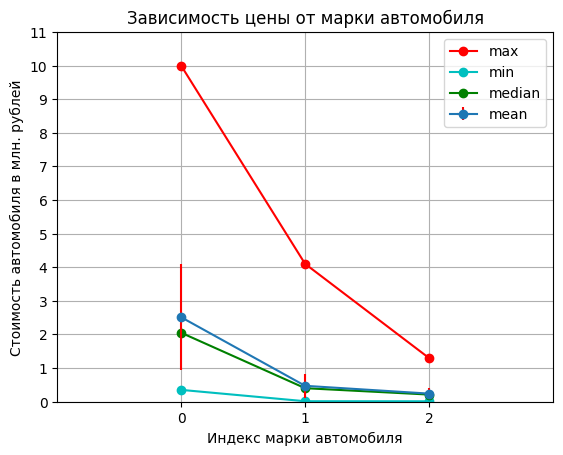

In [84]:
fig, ax = plt.subplots()
ax.plot(car_brand.index.to_series(),car_brand['sell_pr_max'], color='r', marker='o', markersize=6)
ax.plot(car_brand.index.to_series(),car_brand['sell_pr_min'], color='c', marker='o', markersize=6)
ax.plot(car_brand.index.to_series(),car_brand['sell_pr_median'], color='g', marker='o', markersize=6)
ax.errorbar(car_brand.index.to_series(), car_brand['sell_pr_mean'], xerr=0, yerr=car_brand['sell_pr_std'], fmt='o-', ecolor='red')

plt.xlabel('Индекс марки автомобиля') #Подпись для оси х
plt.ylabel('Стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.title('Зависимость цены от марки автомобиля') #Название
ax.set(xlim=(-1, 3), xticks=np.arange(0, 3, 1),
    ylim=(0, 11*math.pow(10,6)), yticks=np.arange(0, 12)*math.pow(10,6),
       yticklabels=np.arange(0, 12))
ax.legend(['max', 'min','median', 'mean'])
ax.grid()
plt.show()

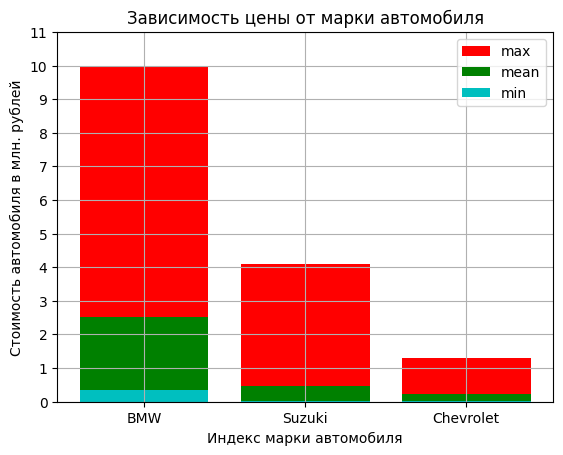

In [85]:
fig, ax = plt.subplots()
ax.bar(car_brand['brand'],car_brand['sell_pr_max'], color='r')
ax.bar(car_brand['brand'],car_brand['sell_pr_mean'], color='g')
ax.bar(car_brand['brand'],car_brand['sell_pr_min'], color='c')
#ax.errorbar(car_brand['brand'], car_brand['sell_pr_median'], xerr=0, yerr=car_brand['sell_pr_std'], fmt='o-', ecolor='red')
plt.xlabel('Индекс марки автомобиля') #Подпись для оси х
plt.ylabel('Стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.title('Зависимость цены от марки автомобиля') #Название
ax.set(#xlim=(-1, 3), xticks=np.arange(0, 3, 1),
    ylim=(0, 11*math.pow(10,6)), yticks=np.arange(0, 12)*math.pow(10,6),
       yticklabels=np.arange(0, 12))
ax.legend(['max', 'mean', 'min'])
ax.grid()
plt.show()

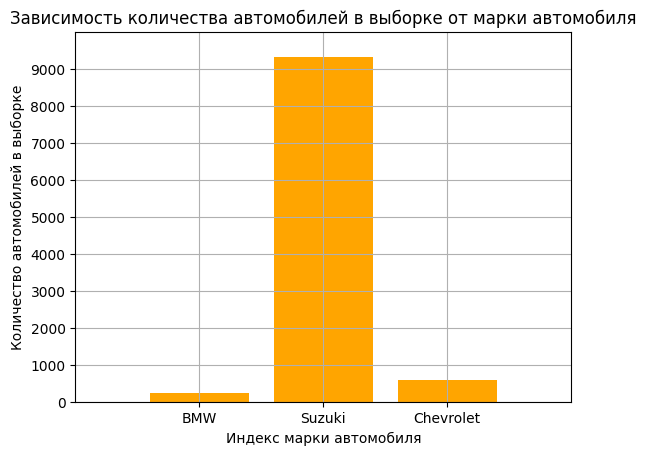

In [86]:
fig, ax = plt.subplots()
ax.bar(car_brand['brand'],car_brand['sell_pr_count'], color='orange')
plt.xlabel('Индекс марки автомобиля') #Подпись для оси х
plt.ylabel('Количество автомобилей в выборке') #Подпись для оси y
plt.title('Зависимость количества автомобилей в выборке от марки автомобиля') #Название
ax.set(xlim=(-1, 3), xticks=np.arange(0, 3, 1),
    ylim=(0, 10000), yticks=np.arange(0, 10, 1)*math.pow(10,3))
ax.grid()
plt.show()

Стоимость автомобиля зависит от марки автомобиля, позволяя условно разделить автомобили на автомобили высокого (BMW), среднего (Suzuki) и низкого класса (Chevrolet)

In [87]:
car_table['brand'] = car_table['brand'].replace(['BMW', 'Suzuki', 'Chevrolet'],['High class', 'Middle ckass', 'Low class'])

Удалим столбец name, так как он имеет много различных текстовых данных, которые были обработаны в столбец brand

In [88]:
car_table.drop(columns='name', inplace = True)

## Исследуем зависимость цены на автомобиль от года его выпуска

In [89]:
sell_pr_year = car_table.groupby('year')['selling_price'].mean()
sell_pr_year

year
1983         300000.0
1991          55000.0
1992          50000.0
1994          88000.0
1995    103333.333333
1996         139000.0
1997     90785.642857
1998    116684.210526
1999     68954.545455
2000     85798.566667
2001         86874.25
2002     92146.317073
2003     95884.359375
2004    115503.847826
2005     132292.66443
2006    163043.454106
2007     172063.15942
2008    195629.537267
2009    230117.603581
2010    277285.637809
2011    311916.182181
2012        364279.96
2013    442524.657957
2014    513476.248555
2015    564641.535644
2016    635422.207003
2017    730463.072889
2018    860630.376608
2019    929950.373967
2020     850317.71028
Name: selling_price, dtype: Float64

In [90]:
sell_year = car_table['year'].unique()
print(np.sort(sell_year))

[1983 1991 1992 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]


In [91]:
sell_year.size

30

In [92]:
sell_numb_year = car_table.groupby('year').size()
print(sell_numb_year.head(5))
print(sell_numb_year.tail(5))

year
1983    1
1991    1
1992    1
1994    3
1995    3
dtype: int64
year
2016     971
2017    1125
2018     855
2019     484
2020     107
dtype: int64


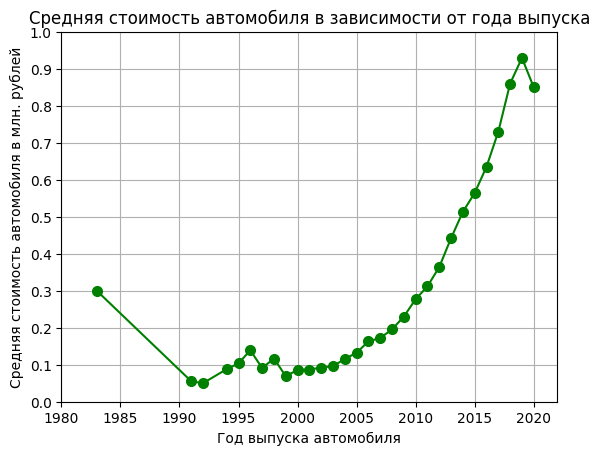

In [93]:
fig, ax = plt.subplots()
ax.plot(sell_pr_year, color='green', marker='o', markersize=7)
plt.xlabel('Год выпуска автомобиля') #Подпись для оси х
plt.ylabel('Средняя стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.title('Средняя стоимость автомобиля в зависимости от года выпуска') #Название
ax.set(xlim=(1980, 2022), xticks=np.arange(1980, 2025, 5), 
       ylim=(0, math.pow(10,6)), yticks=np.arange(0, 11)*math.pow(10,5),
       yticklabels=np.arange(0, 11)/10)
ax.grid()
plt.show()

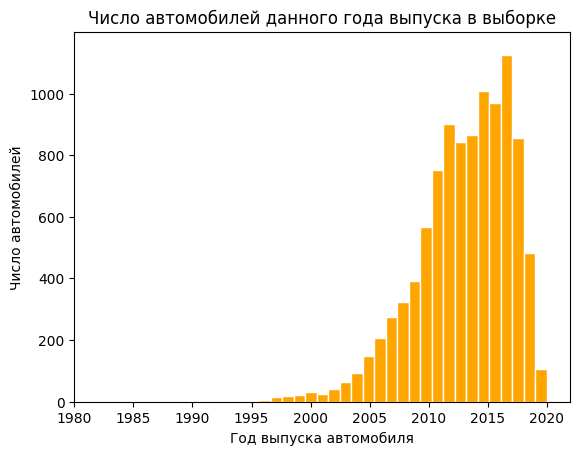

In [94]:
fig, ax = plt.subplots()
car_table['year'].hist(bins=38, color = 'orange', edgecolor = 'white')
#ax.plot(sell_numb_year, color='red', marker='o', markersize=5, linestyle = '')
plt.xlabel('Год выпуска автомобиля') #Подпись для оси х
plt.ylabel('Число автомобилей') #Подпись для оси y
plt.title('Число автомобилей данного года выпуска в выборке') #Название
ax.grid()
ax.set(xlim=(1980, 2022), xticks=np.arange(1980, 2025, 5), 
       ylim=(0, 1200), yticks=np.arange(0, 6)*200)
plt.show()

Из графика cредней стоимости автомобиля в зависимости от года выпуска видно, что примерно 1900 по 2007 год средняя цена автомобиля находиться в небольшом разбросе значений.
Средняя цена на втомобили после 2007 года начинают расти, но к 2020 году цены падают.
Автомобили до 1985 года дорожают.

In [95]:
print(sell_numb_year.loc[:1991])

year
1983    1
1991    1
dtype: int64


Как видно, в выборке данных представлено только 2 автомобиля производства до 1991 года, что не может дать статичстические данные о средней цене автомобиля за наличием малого числа таких автомобилей в данных, поэтому на увеличение цены на автомобили до 1991-ого года принебрегаем и считаем, что цена находиться приверно в одном диапазоне значений. 

In [96]:
car_table.loc[car_table['year'] <= 1993]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
2889,1992,50000,100000,Petrol,Individual,Manual,4,<NA>,<NA>,<NA>,<NA>,<NA>,Middle ckass
3939,1983,300000,10000,Diesel,Individual,Manual,3,<NA>,<NA>,<NA>,<NA>,<NA>,Middle ckass
7948,1991,55000,120000,LPG,Individual,Manual,2,<NA>,<NA>,<NA>,<NA>,<NA>,Middle ckass


In [97]:
sell_pr_year.loc[sell_pr_year == sell_pr_year.max()].index

Index([2019], dtype='Int64', name='year')

В 2019 году были самые высокие цены на автомобили, после этого года цены на новые автомобили немного упали, но в данном случае жтим можно принебречь, так как это могут быть отклонения связвнные с недостатком данных в об автомобилях и естественными колебаниями цены

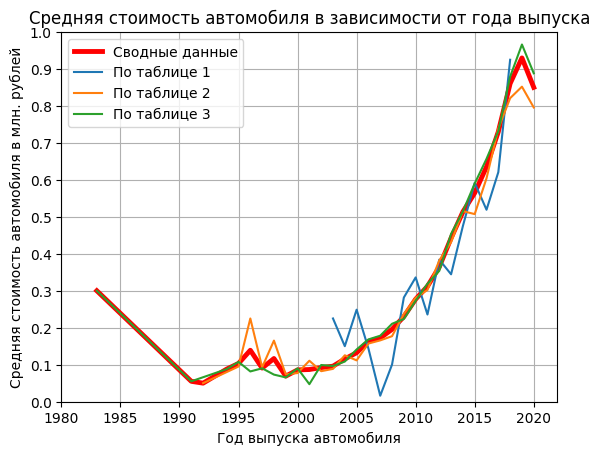

In [98]:
fig, ax = plt.subplots()
ax.plot(sell_pr_year, color='red', linewidth = 3.5)
sell_pr_year1 = car_table_1.groupby('year')['selling_price'].mean()
ax.plot(sell_pr_year1)
sell_pr_year2 = car_table_2.groupby('year')['selling_price'].mean()
ax.plot(sell_pr_year2)
sell_pr_year3 = car_table_3.groupby('year')['selling_price'].mean()
ax.plot(sell_pr_year3)
plt.xlabel('Год выпуска автомобиля') #Подпись для оси х
plt.ylabel('Средняя стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.title('Средняя стоимость автомобиля в зависимости от года выпуска') #Название
ax.set(xlim=(1980, 2022), xticks=np.arange(1980, 2025, 5), 
       ylim=(0, math.pow(10,6)), yticks=np.arange(0, 11)*math.pow(10,5),
       yticklabels=np.arange(0, 11)/10)
ax.legend(['Сводные данные', 'По таблице 1', 'По таблице 2', 'По таблице 3'])
ax.grid()
plt.show()

Графики зависимости cредней стоимости автомобиля от года выпуска полученные из объединнной таблицы и каждой таблицы по отдельности примерно совпадают, что свидельствует о том, что утверждение про спад цены в 2020 году верно 

## Иcследуем влияние на цену автомобиля тип используемого топлива

In [99]:
sell_pr_fuel = car_table.groupby(['fuel']).agg({'fuel' : 'count', 'selling_price' : ['mean', 'max', 'min', 'median','std']}).reset_index()
sell_pr_fuel

fuel        selling_price                                           
            count           mean       max     min    median            std
0       CNG    86  296116.209302    595000   45000  300000.0  128113.919463
1    Diesel  5271  640045.479795   8150000   40000  500000.0  598561.498125
2  Electric     1       310000.0    310000  310000  310000.0           <NA>
3       LPG    55  187654.527273    375000   50000  180000.0   81630.417315
4    Petrol  4729  359085.227532  10000000   10000  300000.0  361480.279816

Число автомобилей работающий от электричества в данной выборке равно 1, что не достаточно для оценки цены на данный тип автомобиля и обучения модели, поэтому удаляем данную запись

In [100]:
car_table = car_table.drop(car_table[car_table['fuel'] == 'Electric'].index)
sell_pr_fuel = sell_pr_fuel[sell_pr_fuel['fuel', ''] != 'Electric']
sell_pr_fuel

fuel        selling_price                                          
          count           mean       max    min    median            std
0     CNG    86  296116.209302    595000  45000  300000.0  128113.919463
1  Diesel  5271  640045.479795   8150000  40000  500000.0  598561.498125
3     LPG    55  187654.527273    375000  50000  180000.0   81630.417315
4  Petrol  4729  359085.227532  10000000  10000  300000.0  361480.279816

In [101]:
sell_pr_fuel['std_persent'] = sell_pr_fuel['selling_price','std']/sell_pr_fuel['selling_price','mean']*100
sell_pr_fuel

C:\Users\rpong\AppData\Local\Temp\ipykernel_29860\2628547226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_pr_fuel['std_persent'] = sell_pr_fuel['selling_price','std']/sell_pr_fuel['selling_price','mean']*100


fuel        selling_price                                            \
          count           mean       max    min    median            std   
0     CNG    86  296116.209302    595000  45000  300000.0  128113.919463   
1  Diesel  5271  640045.479795   8150000  40000  500000.0  598561.498125   
3     LPG    55  187654.527273    375000  50000  180000.0   81630.417315   
4  Petrol  4729  359085.227532  10000000  10000  300000.0  361480.279816   

  std_persent  
               
0   43.264744  
1   93.518588  
3   43.500372  
4  100.666987

In [102]:
sell_pr_fuel = sell_pr_fuel.rename(columns={'selling_price' : 'sell_pr'})
sell_pr_fuel.columns = sell_pr_fuel.columns.map('_'.join)
sell_pr_fuel = sell_pr_fuel.rename(columns={'fuel_' : 'fuel', 'std_persent_' :'std_persent'})
sell_pr_fuel

,fuel,fuel_count,sell_pr_mean,sell_pr_max,sell_pr_min,sell_pr_median,sell_pr_std,std_persent
0,CNG,86,296116.209302,595000,45000,300000.0,128113.919463,43.264744
1,Diesel,5271,640045.479795,8150000,40000,500000.0,598561.498125,93.518588
3,LPG,55,187654.527273,375000,50000,180000.0,81630.417315,43.500372
4,Petrol,4729,359085.227532,10000000,10000,300000.0,361480.279816,100.666987


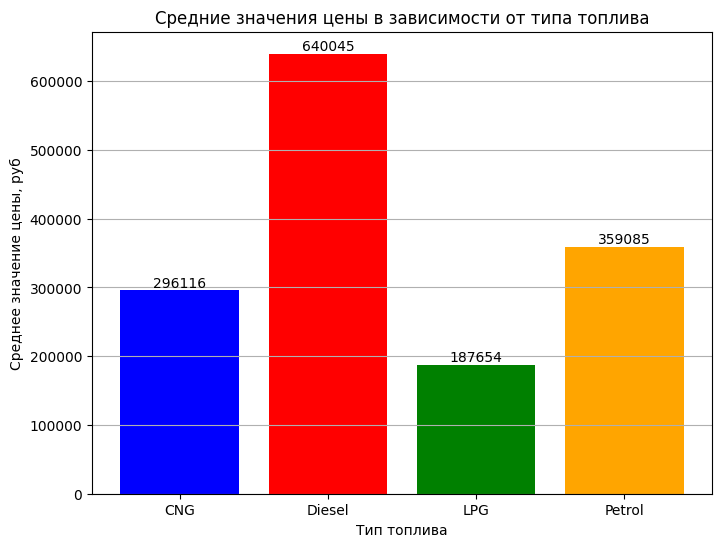

In [103]:
colors = ['blue', 'red', 'green', 'orange']  # Цвета для столбцов A, B и C соответственно

plt.figure(figsize=(8, 6))
bars = plt.bar(sell_pr_fuel['fuel'], sell_pr_fuel['sell_pr_mean'], color=colors)

plt.title('Средние значения цены в зависимости от типа топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Среднее значение цены, руб')

# Добавим подписи значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

Из графика видно, что самыми дорогими автомобилями являются автомобили с дизельным видом топлива, на втором месте автомобили на бензине, далее по убывающей идут автомобили на сжатом природном газу (CNG) и на сжиженном нефтяном газу (LPG).

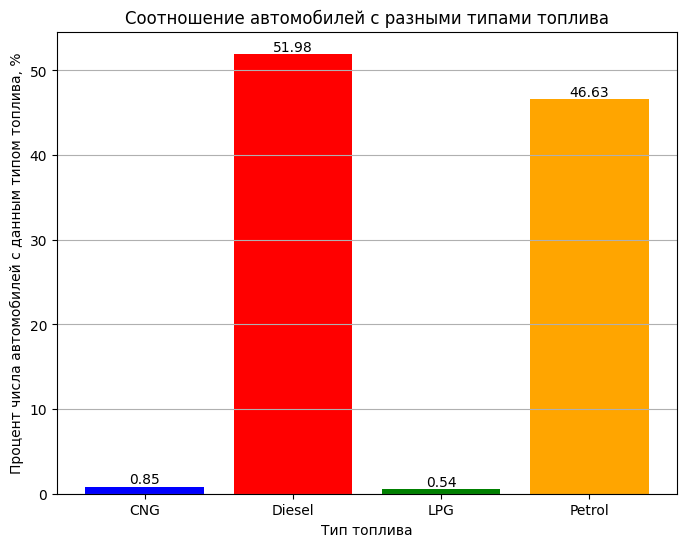

In [104]:
colors = ['blue', 'red', 'green', 'orange']  # Цвета для столбцов A, B и C соответственно
entr_numb = sell_pr_fuel['fuel_count'].sum()
plt.figure(figsize=(8, 6))
bars = plt.bar((sell_pr_fuel['fuel']), sell_pr_fuel['fuel_count']/entr_numb*100, color=colors)
#/entr_numb*100
plt.title('Соотношение автомобилей с разными типами топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Процент числа автомобилей с данным типом топлива, %')

# Добавим подписи значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(float(yval),2), ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

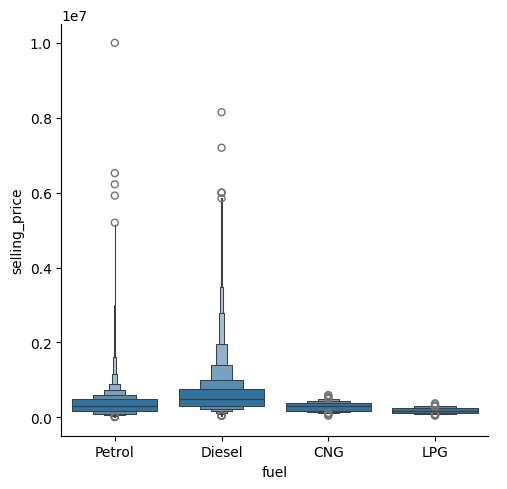

In [105]:
sns.catplot(data=car_table, x="fuel", y="selling_price", kind="boxen")

In [106]:
sell_pr_fuel.columns

Index(['fuel', 'fuel_count', 'sell_pr_mean', 'sell_pr_max', 'sell_pr_min',
       'sell_pr_median', 'sell_pr_std', 'std_persent'],
      dtype='object')

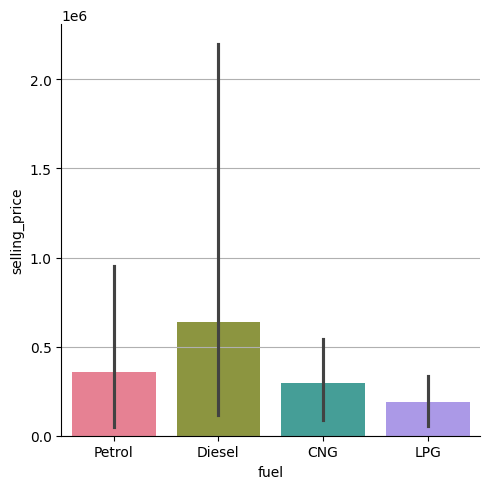

In [107]:
sns.catplot(data=car_table, x="fuel", y="selling_price", hue="fuel",  errorbar=("pi", 95), kind="bar", palette=sns.color_palette("husl", 4), legend=False)
plt.grid(axis = 'y')

Из графиков видно, что тип топлива влияет на стоимость автомобиля, число автомобилей на газу в выборке очень мало, поэтому объединим 2 вида газа в один

In [108]:
car_table['fuel'] = car_table['fuel'].replace(['CNG','LPG'],'Gaz')

In [109]:
sell_pr_fuel = car_table.groupby(['fuel']).agg({'fuel' : 'count', 'selling_price' : ['mean', 'max', 'min', 'median','std']}).reset_index()
sell_pr_fuel

fuel        selling_price                                          
          count           mean       max    min    median            std
0  Diesel  5271  640045.479795   8150000  40000  500000.0  598561.498125
1     Gaz   141  253808.460993    595000  45000  231000.0  123911.965383
2  Petrol  4729  359085.227532  10000000  10000  300000.0  361480.279816

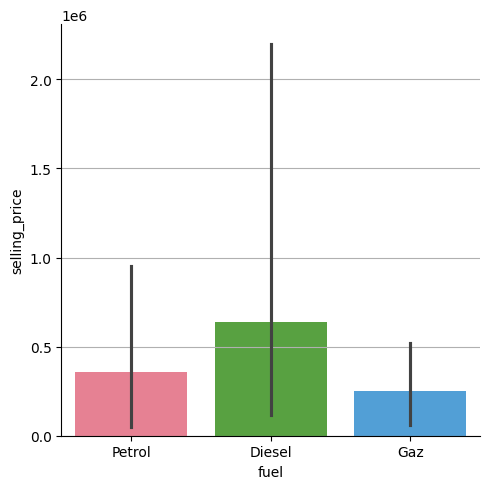

In [110]:
sns.catplot(data=car_table, x="fuel", y="selling_price", hue="fuel",  errorbar=("pi", 95), kind="bar", palette=sns.color_palette("husl", 3), legend=False)
plt.grid(axis = 'y')

Исходная зависимость цены от типа топлива сохраняется
Присвоим типам топлива автомобиля численные значения для возможности обучения модели

In [111]:
car_table['fuel'].unique()

<StringArray>
['Petrol', 'Diesel', 'Gaz']
Length: 3, dtype: string

In [112]:
car_table['fuel'] = car_table['fuel'].replace(['Petrol', 'Diesel', 'Gaz'],['1','0','2'])

## Иcследуем влияние на цену автомобиля числа пойденных автомобилем километров

In [113]:
sell_pr_kmdr = car_table.groupby(['km_driven'])['selling_price'].mean().reset_index()
sell_pr_kmdr.sort_values(by='km_driven')
sell_pr_kmdr.describe()

,km_driven,selling_price
count,1474.0,1474.0
mean,74469.028494,556128.038229
std,98915.556363,462711.602947
min,1.0,10000.0
25%,28503.0,300000.0
50%,54837.5,472039.348684
75%,89273.0,675000.0
max,2360457.0,6000000.0


In [114]:
step = math.pow(10,4)
sell_pr_kmdr['mean_km_driven'] = (((sell_pr_kmdr['km_driven']) + step/2) // step) * step
sell_pr_kmdr

,km_driven,selling_price,mean_km_driven
0,1,229500.0,0.0
1,101,806333.333333,0.0
2,500,58500.0,0.0
3,1000,719307.692308,0.0
4,1001,662500.0,0.0
...,...,...,...
1469,560000,665000.0,560000.0
1470,577414,194000.0,580000.0
1471,806599,250000.0,810000.0
1472,1500000,500000.0,1500000.0


In [115]:
sell_pr_avr_kmdr = sell_pr_kmdr.groupby('mean_km_driven').agg({'selling_price' : ['mean', 'count']}).reset_index()
sell_pr_avr_kmdr.head(4)

mean_km_driven  selling_price      
                           mean count
0            0.0  626262.644351    65
1        10000.0  830154.082388   131
2        20000.0   719048.25778   125
3        30000.0  646140.220758   131

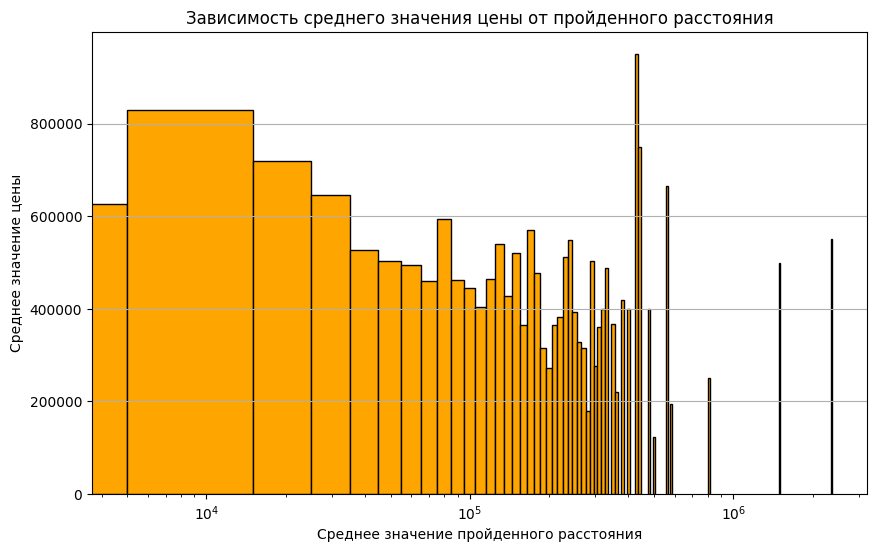

In [116]:
plt.figure(figsize=(10, 6))
plt.bar(sell_pr_avr_kmdr['mean_km_driven'], sell_pr_avr_kmdr['selling_price', 'mean'], width=step, color='orange', edgecolor = 'black')
plt.xscale('log', base=10)
plt.ylabel('Среднее значение цены')
plt.xlabel('Среднее значение пройденного расстояния')
plt.title('Зависимость среднего значения цены от пройденного расстояния')
plt.grid(axis='y')
plt.show()

In [117]:
sell_pr_all_kmdr = sell_pr_kmdr.groupby('mean_km_driven')['selling_price'].agg(['mean','max','min','count']).reset_index()
sell_pr_all_kmdr.head(3)

,mean_km_driven,mean,max,min,count
0,0.0,626262.644351,1950000.0,25000.0,65
1,10000.0,830154.082388,4800000.0,40000.0,131
2,20000.0,719048.25778,3444000.0,60000.0,125


In [118]:
sell_pr_all_kmdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mean_km_driven  47 non-null     Float64
 1   mean            47 non-null     Float64
 2   max             47 non-null     Float64
 3   min             47 non-null     Float64
 4   count           47 non-null     Int64  
dtypes: Float64(4), Int64(1)
memory usage: 2.2 KB


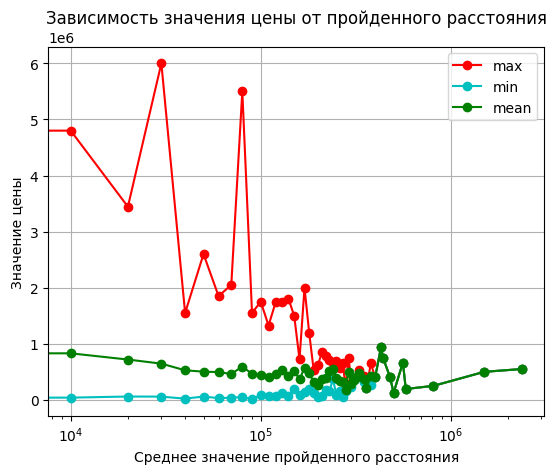

In [119]:
fig, ax = plt.subplots()
#ax.bar(sell_pr_all_kmdr['mean_km_driven'], sell_pr_all_kmdr['mean'], width=step, color='orange')
plt.xscale('log', base=10)
plt.xlabel('Ось х') #Подпись для оси х
plt.ylabel('Ось y') #Подпись для оси y
plt.title('Первый график') #Название
ax.plot(sell_pr_all_kmdr['mean_km_driven'], sell_pr_all_kmdr['max'], color='r', marker='o', markersize=6)
ax.plot(sell_pr_all_kmdr['mean_km_driven'], sell_pr_all_kmdr['min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_all_kmdr['mean_km_driven'], sell_pr_all_kmdr['mean'], color='g', marker='o', markersize=6)
plt.ylabel('Значение цены')
plt.xlabel('Среднее значение пройденного расстояния')
plt.title('Зависимость значения цены от пройденного расстояния')
ax.legend(['max', 'min', 'mean', 'median'])
#ax.set(xlim=(0, 6), xticks=np.arange(0, 7),
    #   ylim=(18, 36), yticks=np.arange(18, 38, 2))
ax.grid()
plt.show()

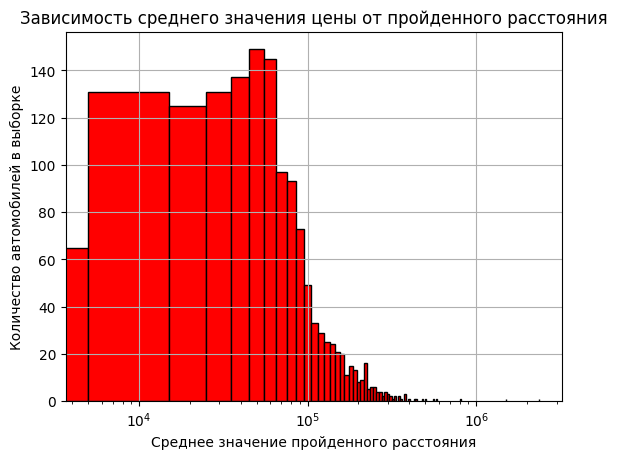

In [120]:
fig, ax = plt.subplots()
#ax.bar(sell_pr_all_kmdr['mean_km_driven'], sell_pr_all_kmdr['mean'], width=step, color='orange')
plt.xscale('log', base=10)
plt.xlabel('Ось х') #Подпись для оси х
plt.ylabel('Ось y') #Подпись для оси y
plt.title('Первый график') #Название
#ax.plot(sell_pr_all_kmdr['mean_km_driven'], sell_pr_all_kmdr['count'], color='r', marker='o', markersize=6)
ax.bar(sell_pr_all_kmdr['mean_km_driven'], sell_pr_all_kmdr['count'], width=step, color='r', edgecolor = 'black')
plt.ylabel('Количество автомобилей в выборке')
plt.xlabel('Среднее значение пройденного расстояния')
plt.title('Зависимость среднего значения цены от пройденного расстояния')
#ax.set(xlim=(0, 6), xticks=np.arange(0, 7),
    #   ylim=(18, 36), yticks=np.arange(18, 38, 2))
ax.grid()
plt.show()

In [121]:
car_lange_km_dr = car_table[car_table['km_driven']>5*math.pow(10,5)]
car_lange_km_dr['brand'].size

5

Из графиков видно, что с увеличением пройденного расстояния стоимость автомобиля уменьшается линейн в логарифмическом масштабе, большими средними ценами при большом пройденном растоянии можно принебречь, так как в выборке мало машин с большим пройденным расстоянием, что не позволяет вычислить реальное среднее значение.
Также явно видно, что максимальная цена уменьшается с увеличением пробега, что подтверждает теорию.
Преобразуем непрерывные данные в дискретные для обучения модели с учётом логарифма пробега зависимости

In [122]:
car_table['km_dr_gr']=pd.qcut(car_table['km_driven'],4)
qkm = car_table.groupby(['km_dr_gr'])['selling_price'].mean()
qkm.reset_index()
qkm.to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

C:\Users\rpong\AppData\Local\Temp\ipykernel_29860\1656260845.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qkm = car_table.groupby(['km_dr_gr'])['selling_price'].mean()


,selling_price
km_dr_gr,
"(0.999, 35000.0]",693111.427847
"(35000.0, 63654.0]",515373.634224
"(63654.0, 99000.0]",420088.688486
"(99000.0, 2360457.0]",384000.174428


In [123]:
car_table['km_dr_gr'] = car_table['km_dr_gr'].astype(str)
car_table['km_dr_gr'] = car_table['km_dr_gr'].replace(['(0.999, 35000.0]', '(35000.0, 63654.0]',
                                  '(63654.0, 99000.0]', '(99000.0, 2360457.0]'], 
                                    [35000,60000,100000,150000])
car_table['km_dr_gr'] = car_table['km_dr_gr'].astype(np.int64)
car_table['km_dr_gr']

C:\Users\rpong\AppData\Local\Temp\ipykernel_29860\2485382970.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_table['km_dr_gr'] = car_table['km_dr_gr'].replace(['(0.999, 35000.0]', '(35000.0, 63654.0]',


0         35000
1         60000
2         35000
3         35000
4         60000
          ...  
10137     60000
10138    100000
10139    150000
10140    150000
10141    150000
Name: km_dr_gr, Length: 10141, dtype: int64

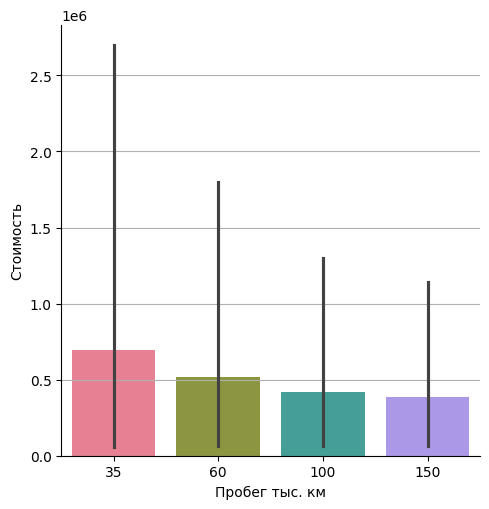

In [124]:
catplot = sns.catplot(x=np.int64(np.rint((car_table['km_dr_gr']/math.pow(10,3)))), y=car_table["selling_price"], hue=car_table["km_dr_gr"],  errorbar=("pi", 95), kind="bar", palette=sns.color_palette("husl", 4), legend=False)
catplot.set_axis_labels("Пробег тыс. км", "Стоимость")
catplot.set_titles('Цена от пробега')
plt.grid(axis = 'y')

После группировка явно видно сохранение зависимости уменьшения цены от пройденного расстояния


## Влияние типа трансмиссии на цену автомобиля

In [125]:
sell_pr_trans = car_table.groupby(['transmission'])['selling_price'].mean().reset_index()
sell_pr_trans

,transmission,selling_price
0,Automatic,1288394.625418
1,Manual,427508.738533


In [126]:
sell_numb_trans = car_table.groupby('transmission').size()
sell_numb_trans

transmission
Automatic     897
Manual       9244
dtype: int64

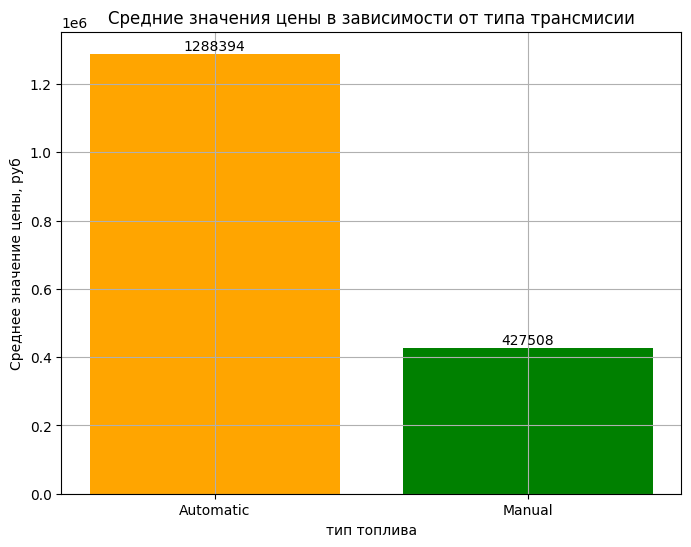

In [127]:
colors = ['orange', 'green']  # Цвета для столбцов A, B и C соответственно

plt.figure(figsize=(8, 6))
bars = plt.bar(sell_pr_trans['transmission'], sell_pr_trans['selling_price'], color=colors)

plt.title('Средние значения цены в зависимости от типа трансмисии')
plt.xlabel('тип топлива')
plt.ylabel('Среднее значение цены, руб')

# Добавим подписи значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.grid()
plt.show()

In [128]:
sell_pr_trans2 = sell_pr_trans.set_index('transmission')
sell_pr_trans2.loc['Automatic','selling_price']/sell_pr_trans2.loc['Manual','selling_price']

3.0137269938361695

Значение средней цены автомобилей с автомотической трансмиссией примерно в 3 раза превышает среднюю цену на автомобили с ручной трансмиссией.
Следовательно автомобили с автоматической трансмиссией стоят дороже.

## Зависимость средней цены на автомобиль от типа продавца

In [129]:
sell_pr_seller = car_table.groupby(['seller_type'])['selling_price'].mean()
sell_pr_seller

seller_type
Dealer              775965.866979
Individual          454367.934443
Trustmark Dealer    782877.192982
Name: selling_price, dtype: Float64

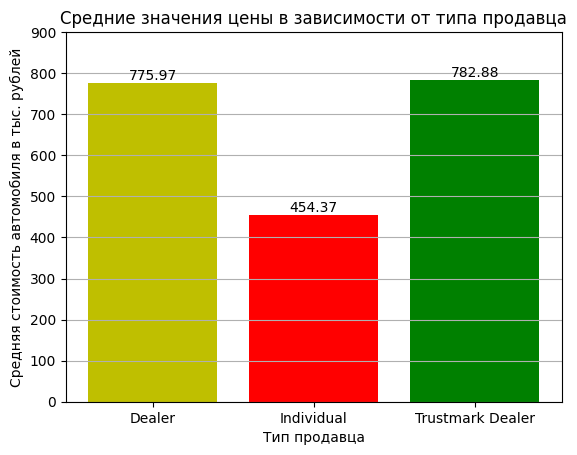

In [130]:
colors = ['y', 'r', 'g']  # Цвета для столбцов A, B и C соответственно
fig, ax = plt.subplots()
fig.figsize=(8, 6)
bars = ax.bar(sell_pr_seller.index.to_series(), sell_pr_seller, color=colors)

plt.title('Средние значения цены в зависимости от типа продавца')
plt.xlabel('Тип продавца')
plt.ylabel('Средняя стоимость автомобиля в тыс. рублей') #Подпись для оси y
ax.set(ylim=(0, 9*math.pow(10,5)), yticks=np.arange(0, 10)*math.pow(10,5), 
       yticklabels=np.round(np.arange(0, 10)*math.pow(10,2)).astype(int))

# Добавим подписи значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval/1000,2), ha='center', va='bottom')
ax.grid(axis='y')
plt.show()

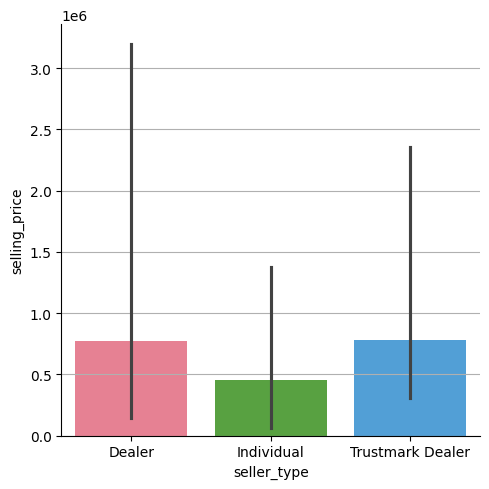

In [131]:
sns.catplot(data=car_table, x='seller_type', y="selling_price", hue="seller_type",  errorbar=("pi", 95), kind="bar", palette=sns.color_palette("husl", 3), legend=False)
plt.grid(axis = 'y')

In [132]:
(sell_pr_seller['Trustmark Dealer']/sell_pr_seller['Dealer']-1)*100

0.8906739713638867

Из графика виднно, что самыми дорогими автомобилями являются автомобили с поставляемые от диллера, а автомобили от индивидуального продавца в среднем дешевле. Также можно заметить, что средняя цена для доверенного диллера выше обычного примерно на 1 %, что является небольшим отклонение, поэтому объединим эти 2 типа диллеров в один 

In [133]:
car_table['seller_type'] = car_table['seller_type'].replace(['Trustmark Dealer'],['Dealer'])
print(car_table['seller_type'].unique())

<StringArray>
['Dealer', 'Individual']
Length: 2, dtype: string


## Зависимость средней цены на автомобиль от числа владельцев

In [134]:
sell_pr_owner = car_table.groupby(['owner'])['selling_price'].mean()
#.reset_index()
sell_pr_owner

owner
0    561255.162069
1     601189.65824
2    369550.946435
3    275288.154639
4    216711.318182
Name: selling_price, dtype: Float64

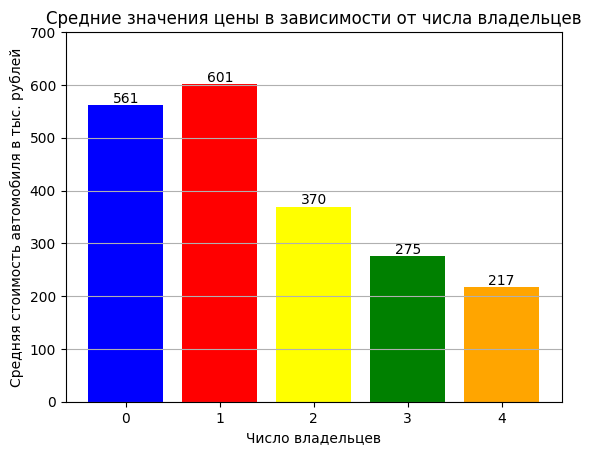

In [135]:
colors = ['blue', 'red', 'yellow', 'green', 'orange']  # Цвета для столбцов A, B и C соответственно
fig, ax = plt.subplots()
fig.figsize=(8, 6)
bars = ax.bar(sell_pr_owner.index.to_series(), sell_pr_owner, color=colors)

plt.title('Средние значения цены в зависимости от числа владельцев')
plt.xlabel('Число владельцев')
plt.ylabel('Средняя стоимость автомобиля в тыс. рублей') #Подпись для оси y
ax.set(ylim=(0, 7*math.pow(10,5)), yticks=np.arange(0, 8)*math.pow(10,5),
       yticklabels=(np.arange(0, 8)*math.pow(10,2)).astype(int))
# Добавим подписи значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, (int)(round(int(yval),-3)/1000), ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

C:\Users\rpong\AppData\Local\Temp\ipykernel_29860\1750427811.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(data=car_table, x="owner", y="selling_price", hue="owner",  errorbar=("pi", 95), kind="bar", palette=sns.color_palette("husl", 4), legend=False)


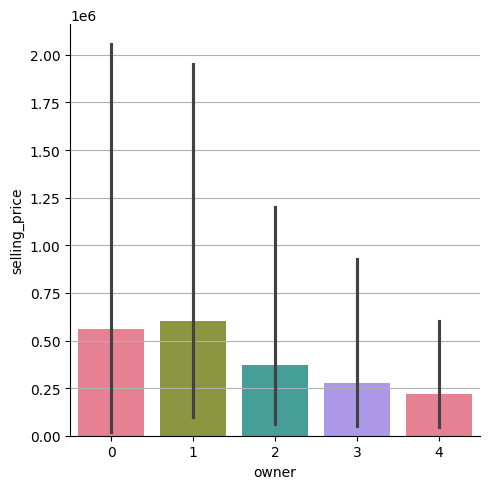

In [136]:
sns.catplot(data=car_table, x="owner", y="selling_price", hue="owner",  errorbar=("pi", 95), kind="bar", palette=sns.color_palette("husl", 4), legend=False)
plt.grid(axis = 'y')

In [137]:
car_table.groupby(['owner'])['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
0,290.0,561255.162069,761078.622252,10000.0,105000.0,400000.0,725000.0,6523000.0
1,6092.0,601189.65824,578937.568157,15000.0,300000.0,495000.0,700000.0,10000000.0
2,2763.0,369550.946435,323844.675087,20000.0,170000.0,300000.0,450999.5,4400000.0
3,776.0,275288.154639,235493.414121,22000.0,130000.0,210000.0,350000.0,2300000.0
4,220.0,216711.318182,151217.053619,31000.0,100750.0,167500.0,286250.0,810000.0


In [138]:
sell_pr_all_q_95 = car_table.groupby(['owner'])['selling_price'].quantile(.95)
sell_pr_all_q_95

owner
0    1550500.0
1    1400000.0
2     900000.0
3     650000.0
4     501000.0
Name: selling_price, dtype: Float64

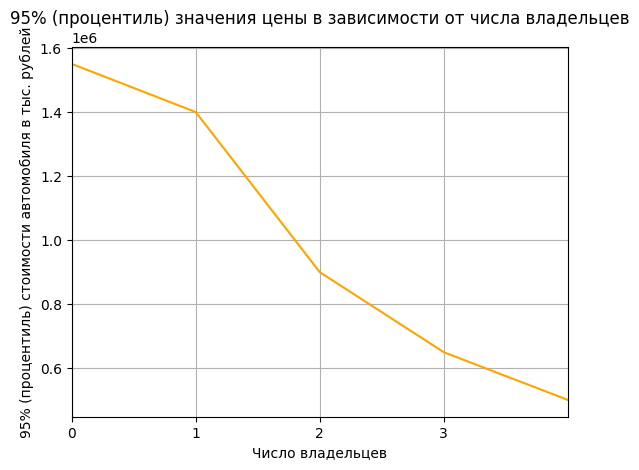

In [139]:
fig, ax = plt.subplots()
fig.figsize=(8, 6)
ax.plot(sell_pr_all_q_95.index.to_series(), sell_pr_all_q_95, color='orange')

plt.title('95% (процентиль) значения цены в зависимости от числа владельцев')
plt.xlabel('Число владельцев')
plt.ylabel('95% (процентиль) стоимости автомобиля в тыс. рублей') #Подпись для оси y
#ax.set(ylim=(0, 7*math.pow(10,5)), yticks=np.arange(0, 8)*math.pow(10,5),
  #     yticklabels=(np.arange(0, 8)*math.pow(10,2)).astype(int))
# Добавим подписи значений над столбцами
ax.set(xlim=(0, 4), xticks=np.arange(0, 4))
ax.grid()
plt.show()

In [140]:
from functools import partial
q_95 = partial(pd.Series.quantile, q=0.95) 
q_10 = partial(pd.Series.quantile, q=0.10) 

sell_pr_all_q = car_table.pivot_table(index='owner', values='selling_price', 
               aggfunc=[q_10, q_95])
sell_pr_all_q

,"functools.partial(<function Series.quantile at 0x000002174261DE40>, q=0.1)","functools.partial(<function Series.quantile at 0x000002174261DE40>, q=0.95)"
,selling_price,selling_price
owner,,
0,45000,1550500.0
1,200000,1400000.0
2,100000,900000.0
3,80000,650000.0
4,60000,501000.0


In [141]:
sell_pr_all_owner = car_table.groupby(['owner'])['selling_price'].agg(['mean','max','min','count','median','std']).reset_index()
sell_pr_all_owner

,owner,mean,max,min,count,median,std
0,0,561255.162069,6523000,10000,290,400000.0,761078.622252
1,1,601189.65824,10000000,15000,6092,495000.0,578937.568157
2,2,369550.946435,4400000,20000,2763,300000.0,323844.675087
3,3,275288.154639,2300000,22000,776,210000.0,235493.414121
4,4,216711.318182,810000,31000,220,167500.0,151217.053619


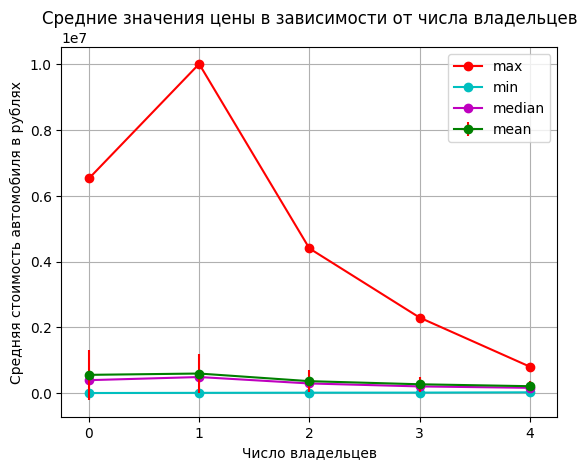

In [142]:
fig, ax = plt.subplots()
plt.xlabel('Ось х') #Подпись для оси х
plt.ylabel('Ось y') #Подпись для оси y
plt.title('Первый график') #Название
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['max'], color='r', marker='o', markersize=6)
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['median'], color='m', marker='o', markersize=6)
ax.errorbar(sell_pr_all_owner['owner'], sell_pr_all_owner['mean'], xerr=0, yerr=sell_pr_all_owner['std'],color='g', fmt='o-', ecolor='red')
plt.title('Средние значения цены в зависимости от числа владельцев')
plt.xlabel('Число владельцев')
plt.ylabel('Средняя стоимость автомобиля в рублях') #Подпись для оси y
ax.set(xlim=(-0.25, 4.25), xticks=np.arange(0, 5))
ax.legend(['max', 'min', 'median', 'mean'])
ax.grid()
plt.show()

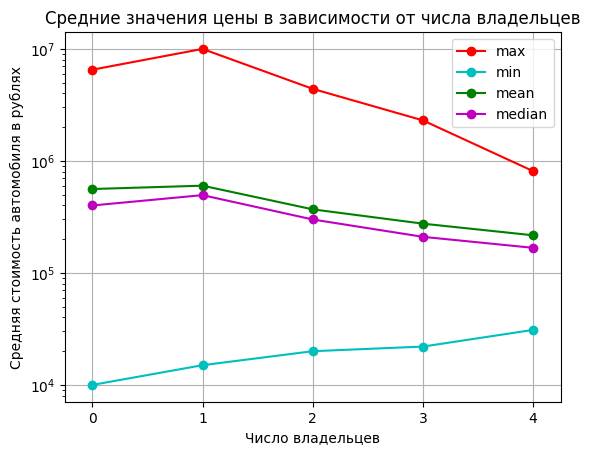

In [143]:
fig, ax = plt.subplots()
plt.yscale('log', base=10)
plt.xlabel('Ось х') #Подпись для оси х
plt.ylabel('Ось y') #Подпись для оси y
plt.title('Первый график') #Название
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['max'], color='r', marker='o', markersize=6)
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['mean'], color='g', marker='o', markersize=6)
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['median'], color='m', marker='o', markersize=6)
plt.title('Средние значения цены в зависимости от числа владельцев')
plt.xlabel('Число владельцев')
plt.ylabel('Средняя стоимость автомобиля в рублях') #Подпись для оси y
ax.set(xlim=(-0.25, 4.25), xticks=np.arange(0, 5))
ax.legend(['max', 'min', 'mean', 'median'])
ax.grid()
plt.show()

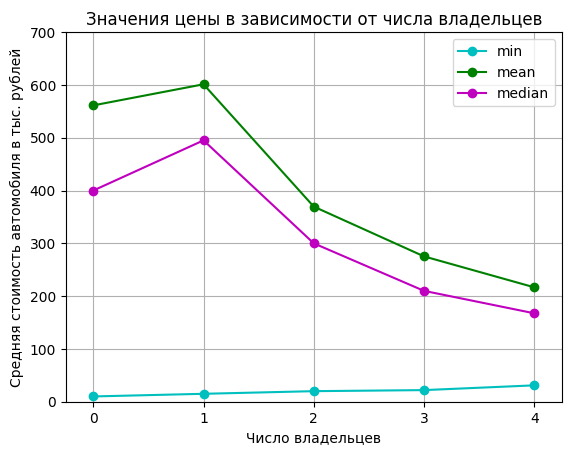

In [144]:
fig, ax = plt.subplots()
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['mean'], color='g', marker='o', markersize=6)
ax.plot(sell_pr_all_owner['owner'], sell_pr_all_owner['median'], color='m', marker='o', markersize=6)
plt.title('Значения цены в зависимости от числа владельцев')
plt.xlabel('Число владельцев')
plt.ylabel('Средняя стоимость автомобиля в тыс. рублей') #Подпись для оси y
ax.set(xlim=(-0.25, 4.25), xticks=np.arange(0, 5),
       ylim=(0, 7*math.pow(10,5)), yticks=np.arange(0, 8)*math.pow(10,5),
       yticklabels=(np.arange(0, 8)*math.pow(10,2)).astype(int))
ax.legend(['min', 'mean', 'median'])
ax.grid()
plt.show()

Из графиков можно заметить, что с увеличение числа владельцев стоимость автомобилей падает, но для одного владельца стоимость возрастает, это может быть связано с неравномерностью выборки, так как в выборке присутствует очень дорогой автомобиль от одного владельца.Также график 95 процентиля цен видна явлая тенденция снижения цены на автомобиль от увеличения числа владельцев. 

## Зависимость средней цены на автомобиль от расхода топлива автомобиля

In [145]:
car_table['mileage'].isnull().sum()

3835

Данная колонка имеет пропуски в данных
Изучим сначала существующие данные

In [146]:
sell_pr_mileage = car_table.groupby(['mileage']).agg({'selling_price' : 'mean', 'brand' : 'count'}).reset_index()
sell_pr_mileage

,mileage,selling_price,brand
0,0.0 kmpl,729214.285714,14
1,10.0 kmpl,1762500.0,2
2,10.1 kmpl,325000.0,2
3,10.5 kmpl,286062.375,16
4,10.71 kmpl,235000.0,1
...,...,...,...
385,33.0 km/kg,370000.0,1
386,33.44 km/kg,330000.0,1
387,42.0 kmpl,10000000.0,1
388,9.0 kmpl,1252500.0,4


Как можно заметить значения расхода топлива выражены в разных единицах км/л и км/кг
Преобразуем исходную таблицу
Для этого разделим столбец 'miliage' на 2
Первый будет обозначать численное значение расхода топлива, а второй за его размерность

In [147]:
def word_list(line):
    if (line != ''):
        words = line.split()
    else:
        words = ['']
    return words
def words(line, word_numb = 1, start_position = 0):
    if (line != ''):
        words = line.split()
    else:
        for i in range(word_numb):
            words.append('_')
    return ' '.join(words[start_position : (start_position + word_numb)])

In [148]:
car_table['mileage'] = car_table['mileage'].fillna("missing")

In [149]:
def words(line, word_numb = 1, start_position = 0):
    if (line == 'missing'):
        words = []
        for i in range(word_numb + start_position):
            words.append('missing')
    else:
        words = line.split()
    return ' '.join(words[start_position : (start_position + word_numb)])

In [150]:
car_table['mileage']

0           missing
1           missing
2           missing
3           missing
4           missing
            ...    
10137     18.9 kmpl
10138    22.54 kmpl
10139     18.5 kmpl
10140     16.8 kmpl
10141     19.3 kmpl
Name: mileage, Length: 10141, dtype: string

In [151]:
car_table['mlg_val'] = car_table['mileage'].apply(words, word_numb = 1)
car_table['mlg_dim'] = car_table['mileage'].apply(words, word_numb = 1, start_position = 1)
car_table['mlg_val'] = car_table.mlg_val.str.replace("missing", "0")
car_table['mlg_val'] = car_table['mlg_val'].astype(float)
car_table['mlg_dim'] = car_table['mlg_dim'].convert_dtypes()
car_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10141 entries, 0 to 10141
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10141 non-null  Int64  
 1   selling_price  10141 non-null  Int64  
 2   km_driven      10141 non-null  Int64  
 3   fuel           10141 non-null  string 
 4   seller_type    10141 non-null  string 
 5   transmission   10141 non-null  string 
 6   owner          10141 non-null  Int64  
 7   mileage        10141 non-null  string 
 8   engine         6306 non-null   string 
 9   max_power      6309 non-null   string 
 10  torque         6305 non-null   string 
 11  seats          6306 non-null   Int64  
 12  brand          10141 non-null  object 
 13  km_dr_gr       10141 non-null  int64  
 14  mlg_val        10141 non-null  float64
 15  mlg_dim        10141 non-null  string 
dtypes: Int64(5), float64(1), int64(1), object(1), string(8)
memory usage: 1.4+ MB


In [152]:
car_mlg_q = car_table.groupby(['fuel','mlg_dim'])['brand'].count()
car_mlg_q

fuel  mlg_dim
0     kmpl       3442
      missing    1829
1     kmpl       2783
      missing    1946
2     km/kg        81
      missing      60
Name: brand, dtype: int64

Расход для бензина и дизельного топлива расход указывается в километрах на литр, а для газа в километрах на киллограмм

Принимая, что литр бензина эквивалентен кг газа, построим график зависимости цены от расхода топлива

In [153]:
car_mlg = car_table[car_table['mlg_val'] != 0]
car_mlg['mlg_val'].describe()

count    6292.000000
mean       19.524622
std         3.946264
min         9.000000
25%        16.800000
50%        19.600000
75%        22.540000
max        42.000000
Name: mlg_val, dtype: float64

Максимальное значение расхода 42 минимальное 9

In [215]:
step = 1
car_table['mlg_val_d'] = (((car_table['mlg_val']) + step/2) // step) * step

In [222]:
sell_pr_mlg = car_table.groupby('mlg_val_d')['selling_price'].agg(['mean', 'max', 'min', 'median','std', 'count']).reset_index()
sell_pr_mlg.sort_values(by=['mlg_val_d'])
sell_pr_mlg = sell_pr_mlg.drop(sell_pr_mlg[sell_pr_mlg['mlg_val_d'] < 5].index)
sell_pr_mlg['std'] = sell_pr_mlg['std'].fillna(0)
sell_pr_mlg.head(3)

,mlg_val_d,mean,max,min,median,std,count
1,9.0,1252500.0,2500000,275000,1117500.0,1145181.936055,4
2,10.0,1655000.0,4100000,325000,1600000.0,1548527.526394,5
3,11.0,1158818.136364,5500000,54000,840000.0,1066593.462291,66


In [217]:
car_mlg = car_table[car_table['mlg_val'] > 5]

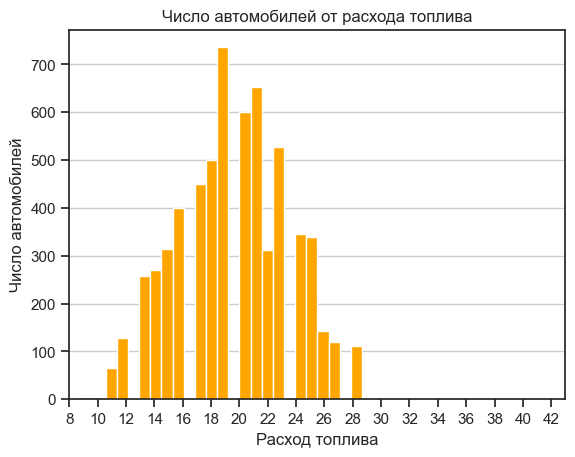

In [218]:
fig, ax = plt.subplots()
car_mlg['mlg_val_d'].hist(bins=42, color = 'orange', edgecolor = 'white')
#ax.plot(sell_numb_year, color='red', marker='o', markersize=5, linestyle = '')
plt.xlabel('Расход топлива')
plt.ylabel('Число автомобилей') #Подпись для оси y
plt.title('Число автомобилей от расхода топлива') #Название
ax.grid(axis = 'x')
ax.set(xlim=(8, 43), xticks=np.arange(8, 43, 2), 
    #   ylim=(0, 1200), yticks=np.arange(0, 6)*200
      )
plt.show()

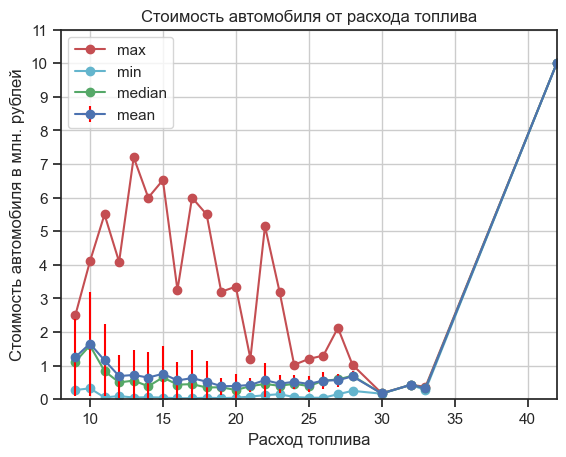

In [219]:
fig, ax = plt.subplots()
ax.plot(sell_pr_mlg['mlg_val_d'],sell_pr_mlg['max'], color='r', marker='o', markersize=6)
ax.plot(sell_pr_mlg['mlg_val_d'],sell_pr_mlg['min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_mlg['mlg_val_d'],sell_pr_mlg['median'], color='g', marker='o', markersize=6)
ax.errorbar(sell_pr_mlg['mlg_val_d'], sell_pr_mlg['mean'], xerr=0, yerr=sell_pr_mlg['std'], fmt='o-', ecolor='red')
plt.ylabel('Стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.xlabel('Расход топлива') #Подпись для оси х
plt.title('Стоимость автомобиля от расхода топлива') #Название
ax.set(xlim=(8, 42), xticks=np.arange(10, 42, 5),
    ylim=(0, 11*math.pow(10,6)), yticks=np.arange(0, 12)*math.pow(10,6),
       yticklabels=np.arange(0, 12))
ax.legend(['max', 'min','median', 'mean'])
ax.grid()
plt.show()

In [225]:
mlg_35 = car_table[car_table['mlg_val_d']>35]
mlg_35

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,km_dr_gr,mlg_val,mlg_dim,mlg_val_d,mpow_val,mpow_dim,mpow_val_d
3806,2017,10000000,30000,1,Individual,Automatic,1,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4,High class,35000,42.0,kmpl,42.0,400.0,bhp,400.0


Стоимость на автомобиль не зависит от объёма топлива, существует 1 автомобиль c максимальным расходом в выборке, также самый дорогой автомобиль в выборке, по всем предыдущим изученным параметрам он имеет достаточно высокую цену
Данный признак не используем для обучения

За 2020 год в России стоимость бензина составляля около 47 руб/л, дизельного топлива около 49 руб/л
газ около 24 руб/кг
Поскольку людям юольше важно сколько они затратят за определённое расстояние введём новый признак - стоимость км, то есть расход двигателя умножим на цену топлива

# !!!!! Признак доделать

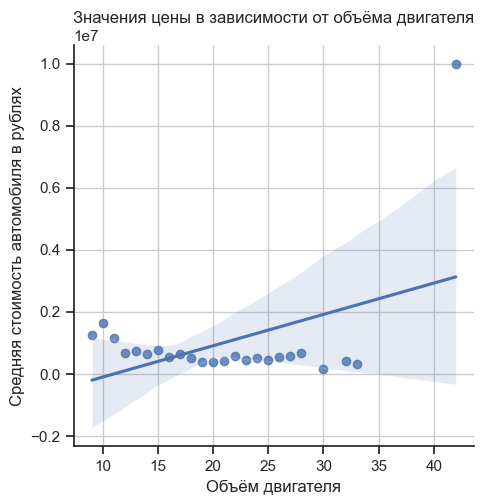

In [226]:
sns.set_theme(style="ticks")
sns.lmplot(x='mlg_val_d', y='mean', data=sell_pr_mlg, height=5)
plt.title('Значения цены в зависимости от объёма двигателя')
plt.xlabel('Объём двигателя')
plt.ylabel('Средняя стоимость автомобиля в рублях') #Подпись для оси y
plt.grid()
plt.show()

In [ ]:
#mlg_test = car_table

In [ ]:
#km_kg_t1 = car_table[car_table['mlg_dim'] == 'km/kg']
#print(km_kg_t1[['mlg_val','mlg_dim']])

In [ ]:
#car_table['mlg_val'] = car_table.apply(lambda row: row['mlg_val'] / 0.8 if row['mlg_dim'] == 'km/kg' else row['mlg_val'] * 1, axis=1)
#km_kg_t2 = car_table[car_table['mlg_dim'] == 'km/kg']
#print(km_kg_t2[['mlg_val','mlg_dim']])

In [ ]:
#car_table = car_table.mlg_dim.str.replace("km/kg", "kmpl")

## Влияние объёма двигателя на цену автомобиля

In [ ]:
car_table['engine'].isnull().sum()

In [ ]:
sell_pr_mileage = car_table.groupby(['engine']).agg({'selling_price' : 'mean', 'brand' : 'count'}).reset_index()
sell_pr_mileage

In [ ]:
car_table['engine'] = car_table['engine'].fillna("missing")

In [ ]:
car_table['eng_val'] = car_table['engine'].apply(words, word_numb = 1)
car_table['eng_dim'] = car_table['engine'].apply(words, word_numb = 1, start_position = 1)

In [ ]:
car_table[['eng_val', 'eng_dim']].info()

In [ ]:
car_table['eng_val'].nunique()

In [ ]:
car_table['eng_val'].unique()

In [ ]:
car_table['eng_dim'].nunique()

In [ ]:
car_table['eng_dim'].unique()

In [ ]:
car_table['eng_val'] = car_table.eng_val.str.replace("missing", "-1")
car_table['eng_val'] = car_table['eng_val'].astype(float)
car_table['eng_dim'] = car_table['eng_dim'].convert_dtypes()

In [ ]:
car_table[['eng_val', 'eng_dim']].info()

Объём двигателя во всех заполненных ячейках имеет размерность см^3 

In [ ]:
sell_pr_eng = car_table.groupby(['eng_val']).agg({'selling_price' : ['mean', 'max', 'min', 'median', 'std', 'count']}).reset_index()
sell_pr_eng = sell_pr_eng.drop(sell_pr_eng[sell_pr_eng['eng_val'] == -1].index)
sell_pr_eng = sell_pr_eng.rename(columns={'selling_price' : 'sell_pr'})
sell_pr_eng.columns = sell_pr_eng.columns.map('_'.join)
sell_pr_eng = sell_pr_eng.rename(columns={'eng_val_' : 'eng_val'})
sell_pr_eng

In [ ]:
#fig, ax = plt.subplots()
#fig.figure()
sns.set_theme(style="ticks")
sns.lmplot(x='eng_val', y='sell_pr_mean', data=sell_pr_eng, height=5)
plt.title('Значения цены в зависимости от объёма двигателя')
plt.xlabel('Объём двигателя')
plt.ylabel('Средняя стоимость автомобиля в рублях') #Подпись для оси y
plt.grid()
plt.show()

In [ ]:
car_eng = car_table[car_table['eng_val'] != -1]

In [ ]:
fig, ax = plt.subplots()
car_eng['eng_val'].hist(bins=20, color = 'orange', edgecolor = 'white')
#ax.plot(sell_numb_year, color='red', marker='o', markersize=5, linestyle = '')
plt.xlabel('Объём двигателя') #Подпись для оси х
plt.ylabel('Число автомобилей') #Подпись для оси y
plt.title('Число автомобилей данного объёма двигателя') #Название
ax.grid(axis = 'x')
ax.set(xlim=(500, 3800), xticks=np.arange(500, 3600, 500), 
       ylim=(0, 1400), yticks=np.arange(0, 8)*200)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sell_pr_eng['eng_val'].hist(bins=14, color = 'orange', edgecolor = 'white')
#ax.plot(sell_numb_year, color='red', marker='o', markersize=5, linestyle = '')
plt.xlabel('Объём двигателя') #Подпись для оси х
plt.ylabel('Число автомобилей') #Подпись для оси y
plt.title('Число автомобилей данного объёма двигателя') #Название
#ax.grid(axis = 'x')
#ax.set(xlim=(1980, 2022), xticks=np.arange(1980, 2025, 5), 
    #   ylim=(0, 1200), yticks=np.arange(0, 6)*200)
plt.show()

In [ ]:
sell_pr_eng.describe()

In [ ]:
step = 4*math.pow(10,2)
car_table['eng_val_ds'] = car_table.apply(lambda row: (((row['eng_val']) + step/2) // step) * step
                                          if row['eng_val'] != -1  else -1, axis=1)
sell_pr_eng = car_table.groupby(['eng_val_ds']).agg({'selling_price' : ['mean', 'max', 'min', 'median', 'std', 'count']}).reset_index()
sell_pr_eng = sell_pr_eng.drop(sell_pr_eng[sell_pr_eng['eng_val_ds'] == -1].index)
sell_pr_eng = sell_pr_eng.rename(columns={'selling_price' : 'sell_pr'})
sell_pr_eng.columns = sell_pr_eng.columns.map('_'.join)
sell_pr_eng = sell_pr_eng.rename(columns={'eng_val_ds_' : 'eng_val'})
mean_std_eng = sell_pr_eng['sell_pr_std'].mean()
sell_pr_eng['sell_pr_std'] = sell_pr_eng['sell_pr_std'].fillna(mean_std_eng)
sell_pr_eng.head(2)


In [ ]:
fig, ax = plt.subplots()
x = sell_pr_eng['eng_val']
y = sell_pr_eng['sell_pr_mean']
plt.errorbar(x, y, xerr=0, yerr=sell_pr_eng['sell_pr_std'], fmt='o-', ecolor='red')
plt.title('Значения цены в зависимости от объёма двигателя')
plt.xlabel('Объём двигателя') #Подпись для оси х
plt.ylabel('Средняя стоимость автомобиля в млн. рублей') #Подпись для оси y
ax.grid()
ax.set(xlim=(500, 4000), xticks=np.arange(500, 4001, 500),
       ylim=(0, 5*math.pow(10,6)), yticks=np.arange(0, 6)*math.pow(10,6),
       yticklabels=(np.arange(0, 6)).astype(int))
plt.show()

In [ ]:
fig, ax = plt.subplots()
#ax.bar(sell_pr_all_owner['mean_km_driven'], sell_pr_all_kmdr['mean'], width=step, color='orange')
ax.plot(sell_pr_eng['eng_val'], sell_pr_eng['sell_pr_max'], color='r', marker='o', markersize=6)
ax.plot(sell_pr_eng['eng_val'], sell_pr_eng['sell_pr_min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_eng['eng_val'], sell_pr_eng['sell_pr_mean'], color='g', marker='o', markersize=6)
ax.plot(sell_pr_eng['eng_val'], sell_pr_eng['sell_pr_median'], color='m', marker='o', markersize=6)
plt.title('Значения цены в зависимости от объёма двигателя')
plt.xlabel('Объём двигателя')
plt.ylabel('Средняя стоимость автомобиля в рублях') #Подпись для оси y
ax.set(xlim=(500, 4000), xticks=np.arange(500, 4001, 500),
       ylim=(0, 11*math.pow(10,6)), yticks=np.arange(0, 12)*math.pow(10,6),
       yticklabels=(np.arange(0, 12)).astype(int))
ax.legend(['max', 'min', 'mean', 'median'])
ax.grid()
plt.show()

Из графиков видна зависисмость увеличения цены с увеличением объёма двигателя автомобиля

Так как все значения объёма двигателя имеют единую размерность и значения без размерности копированы в столбец eng_val, а в столбце eng_val_ds они распределены по интервалам объёма двигателя
удалим ненужные столбцы
и переименуем eng_val_ds в более удобное названи

In [ ]:
car_table = car_table.drop(['engine','eng_val','eng_dim'], axis=1)
car_table = car_table.rename(columns={'eng_val_ds' : 'eng_vol'})
car_table.head(1)

## Влияние максимальной мощности на цену автомобиля

In [157]:
car_table['max_power'].isnull().sum()

3832

In [158]:
sell_pr_pow = car_table.groupby(['max_power']).agg({'selling_price' : 'mean', 'brand' : 'count'}).reset_index()
sell_pr_pow.sort_values(by=['max_power'])
sell_pr_pow

,max_power,selling_price,brand
0,bhp,80000.0,1
1,0,344666.333333,3
2,100 bhp,610782.0,78
3,100.5 bhp,725000.0,2
4,100.57 bhp,691666.666667,3
...,...,...,...
312,98.96 bhp,820789.421053,38
313,98.97 bhp,747500.0,2
314,99 bhp,518970.5,34
315,99.23 bhp,545000.0,4


In [159]:
car_table['max_power'] = car_table['max_power'].fillna("0")

In [160]:
car_table['mpow_val'] = car_table['max_power'].apply(words, word_numb = 1)
car_table['mpow_dim'] = car_table['max_power'].apply(words, word_numb = 1, start_position = 1)

In [161]:
car_table[['mpow_val', 'mpow_dim']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10141 entries, 0 to 10141
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mpow_val  10141 non-null  object
 1   mpow_dim  10141 non-null  object
dtypes: object(2)
memory usage: 237.7+ KB


In [162]:
car_table['mpow_val'].nunique()

317

In [163]:
car_table['mpow_dim'].nunique()

2

In [164]:
car_table['mpow_dim'].unique()

array(['', 'bhp'], dtype=object)

Размернось мощности двигателя в лошадиных силах (л.с.)

In [165]:
sell_pr_pow = car_table.groupby(['mpow_val']).agg({'selling_price' : 'mean', 'brand' : 'count'}).reset_index()
sell_pr_pow.sort_values(by=['mpow_val'])
sell_pr_pow

,mpow_val,selling_price,brand
0,0,458178.917601,3835
1,100,610782.0,78
2,100.5,725000.0,2
3,100.57,691666.666667,3
4,100.6,948133.266667,45
...,...,...,...
312,98.97,747500.0,2
313,99,518970.5,34
314,99.23,545000.0,4
315,99.6,295111.0,9


К данных объёма есть нулевые значение а также значение размерности, заменим bhp на 0
После аназиза заполним пропуски (нулевые значения)

In [166]:
car_table['mpow_val'] = car_table['mpow_val'].str.replace('bhp','0')
car_table['mpow_val'] = car_table['mpow_val'].astype(float)

Объединим значения мощности в группы

In [167]:
car_table['mpow_val']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
10137     67.10
10138     88.73
10139     82.85
10140    110.00
10141     73.90
Name: mpow_val, Length: 10141, dtype: float64

In [174]:
sell_pr_pow = car_table.groupby(['mpow_val']).agg({'selling_price' : 'mean', 'brand' : 'count'}).reset_index()
sell_pr_pow.sort_values(by=['mpow_val'])
sell_pr_pow

,mpow_val,selling_price,brand
0,0.0,458080.330813,3836
1,32.8,87000.0,2
2,34.2,217277.722222,18
3,35.0,105105.210526,19
4,35.5,112000.0,2
...,...,...,...
309,270.9,2666666.666667,3
310,272.0,1000000.0,1
311,280.0,4100000.0,1
312,282.0,5850000.0,1


In [175]:
sell_pr_pow = sell_pr_pow.drop(sell_pr_pow[sell_pr_pow['mpow_val'] == 0].index)
sell_pr_pow['mpow_val'].describe()

count    313.000000
mean     116.062252
std       54.845960
min       32.800000
25%       75.000000
50%      103.000000
75%      149.500000
max      400.000000
Name: mpow_val, dtype: float64

Без учёта нулевых (пустых) значений минимальный ная мощность двигателя 32.8 л.с., а максимальная 400 л.с.

In [176]:
car_pow = car_table[car_table['mpow_val'] != 0]

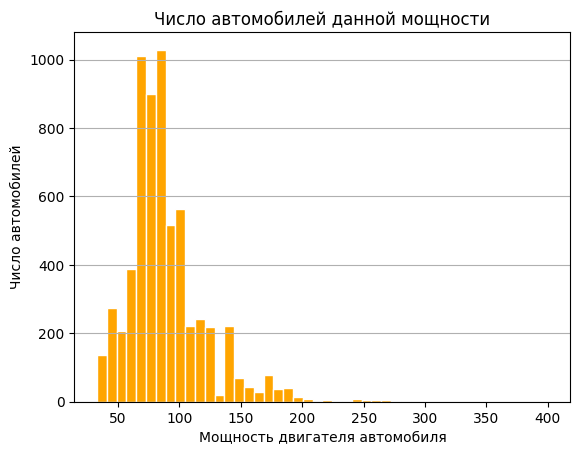

In [177]:
fig, ax = plt.subplots()
car_pow['mpow_val'].hist(bins=46, color = 'orange', edgecolor = 'white')
#ax.plot(sell_numb_year, color='red', marker='o', markersize=5, linestyle = '')
plt.xlabel('Мощность двигателя автомобиля') #Подпись для оси х
plt.ylabel('Число автомобилей') #Подпись для оси y
plt.title('Число автомобилей данной мощности') #Название
ax.grid(axis = 'x')
plt.show()

In [178]:
step = 2.5*math.pow(10,1)
car_table['mpow_val_d'] = (((car_table['mpow_val']) + step/2) // step) * step

In [180]:
sell_pr_pow = car_table.groupby('mpow_val_d')['selling_price'].agg(['mean', 'max', 'min', 'median','std', 'count']).reset_index()
sell_pr_pow.sort_values(by=['mpow_val_d'])
sell_pr_pow = sell_pr_pow.drop(sell_pr_pow[sell_pr_pow['mpow_val_d'] == 0].index)
sell_pr_pow

,mpow_val_d,mean,max,min,median,std,count
1,25.0,97778.571429,280000,29999,70000.0,65899.206245,126
2,50.0,236661.997315,800000,30000,210000.0,134606.471857,745
3,75.0,386110.15398,1050000,33351,370000.0,179384.388068,2877
4,100.0,582888.296,1400000,50000,600000.0,251304.91107,1500
5,125.0,698427.93737,2700000,120000,600000.0,362564.699442,479
6,150.0,940584.531157,4500000,100000,850000.0,584804.99909,337
7,175.0,1652383.541096,4600000,168000,1640000.0,808877.996618,146
8,200.0,2793966.633333,6523000,500000,2650000.0,1637553.248875,60
9,225.0,2391250.0,5500000,275000,1500000.0,2190946.87619,8
10,250.0,3204736.842105,6000000,750000,2700000.0,1837983.854424,19


In [181]:
sell_pr_pow['std'] = sell_pr_pow['std'].fillna(0)

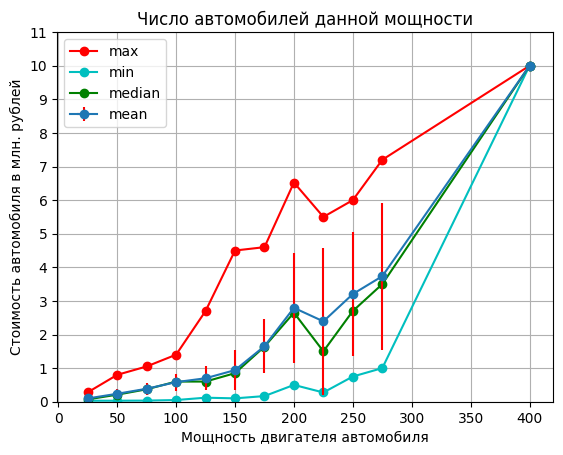

In [182]:
fig, ax = plt.subplots()
ax.plot(sell_pr_pow['mpow_val_d'],sell_pr_pow['max'], color='r', marker='o', markersize=6)
ax.plot(sell_pr_pow['mpow_val_d'],sell_pr_pow['min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_pow['mpow_val_d'],sell_pr_pow['median'], color='g', marker='o', markersize=6)
ax.errorbar(sell_pr_pow['mpow_val_d'], sell_pr_pow['mean'], xerr=0, yerr=sell_pr_pow['std'], fmt='o-', ecolor='red')
plt.ylabel('Стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.xlabel('Мощность двигателя автомобиля') #Подпись для оси х
plt.title('Число автомобилей данной мощности') #Название
ax.set(xlim=(-1, 420), xticks=np.arange(0, 420, 50),
    ylim=(0, 11*math.pow(10,6)), yticks=np.arange(0, 12)*math.pow(10,6),
       yticklabels=np.arange(0, 12))
ax.legend(['max', 'min','median', 'mean'])
ax.grid()
plt.show()

Из графика видна зависимость, что c увеличением мощности двигателя автомобиля его цена увеличивается

In [ ]:
sell_pr_pow

## Влияние номинального момента двигателя на цену автомобиля

In [ ]:
car_table['torque'].isnull().sum()

In [ ]:
car_table['torque'].nunique()

In [ ]:
car_table['torque'].unique()

Значение столбца имеет сложно представление, привести его к единому формату является трудоёмким процессом. Также значение номинального момента и соответствующая номинальная частота вращения опрделяется двигателем, поэтому исключаем данный признак

In [ ]:
car_table.drop(columns='torque', inplace = True)

## Влияние числа посадочных мест на цену автомобиля

In [ ]:
car_table['seats'].isnull().sum()

In [ ]:
car_table['seats'].nunique()

In [ ]:
car_table['seats'].unique()

In [ ]:
#sell_pr_seats = car_table.groupby(['seats']).agg({'selling_price' : 'mean', 'brand' : 'count'}).reset_index()
sell_pr_seats = car_table.groupby(['seats'])['selling_price'].agg(['mean','max','min','count','median']).reset_index()
sell_pr_seats

In [ ]:
sell_pr_seats.info()

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(sell_pr_seats['seats'], sell_pr_seats['mean'], color = 'g')
plt.xlabel('Число посадочных мест') #Подпись для оси х
plt.ylabel('Средняя стоимость автомобиля в тыс. рублей') #Подпись для оси y
plt.title('Средняя стоимость автомобиля в зависимости от числа посадочных мест') #Название
ax.set(xlim=(1, 15), xticks=np.arange(2, 15),
        ylim=(0, 9*math.pow(10,5)), yticks=np.arange(0, 10)*math.pow(10,5), 
        yticklabels=np.round(np.arange(0, 10)*math.pow(10,2)).astype(int))
ax.grid(axis='y')
plt.show()

In [ ]:
fig, ax = plt.subplots()
#car_table['seats'].hist(bins=38, color = 'orange', edgecolor = 'white')
ax.bar(sell_pr_seats['seats'], sell_pr_seats['count'], color='red')
plt.xlabel('Число посадочных мест') #Подпись для оси х
plt.ylabel('Число автомобилей в выборке') #Подпись для оси y
plt.title('Число автомобилей в выборке в зависимости от числа посадочных мест') #Название\
ax.set(xlim=(1, 15), xticks=np.arange(2, 15),
        ylim=(0, 5*math.pow(10,3)), yticks=np.arange(0, 6)*math.pow(10,3))
ax.grid(axis='y')
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.xlabel('Ось х') #Подпись для оси х
plt.ylabel('Ось y') #Подпись для оси y
plt.title('Первый график') #Название
ax.plot(sell_pr_seats['seats'], sell_pr_seats['min'], color='c', marker='o', markersize=6)
ax.plot(sell_pr_seats['seats'], sell_pr_seats['mean'], color='g', marker='o', markersize=6)
ax.plot(sell_pr_seats['seats'], sell_pr_seats['median'], color='r', marker='o', markersize=6)
plt.xlabel('Число посадочных мест') #Подпись для оси х
plt.ylabel('Стоимость автомобиля в тыс. рублей') #Подпись для оси y
plt.title('Стоимость автомобиля в зависимости от числа посfдочных мест') #Название
ax.legend(['min', 'mean', 'median'])
ax.set(xlim=(1, 15), xticks=np.arange(2, 15),
        ylim=(0, 10*math.pow(10,5)), yticks=np.arange(0, 11)*math.pow(10,5), 
        yticklabels=np.round(np.arange(0, 11)*math.pow(10,2)).astype(int))
ax.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.xlabel('Ось х') #Подпись для оси х
plt.ylabel('Ось y') #Подпись для оси y
plt.title('Первый график') #Название
ax.plot(sell_pr_seats['seats'], sell_pr_seats['max'], color='r', marker='o', markersize=6)
plt.xlabel('Число посадочных мест') #Подпись для оси х
plt.ylabel('Стоимость автомобиля в млн. рублей') #Подпись для оси y
plt.title('Стоимость автомобиля в зависимости от числа посfдочных мест') #Название
ax.set(xlim=(1, 15), xticks=np.arange(2, 15),
        ylim=(0, 11*math.pow(10,6)), yticks=np.arange(0, 12)*math.pow(10,6), 
        yticklabels=np.round(np.arange(0, 12)))
ax.grid()
plt.show()

В данных не прослеживается никакой зависимости цены на автомобиль от числа посадочных мест

In [ ]:
car_table.drop(columns='seats', inplace = True)

In [183]:
car_table.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,km_dr_gr,mlg_val,mlg_dim,mlg_val_d,mpow_val,mpow_dim,mpow_val_d
0,2014,335000,27000,1,Dealer,Manual,0,missing,<NA>,0,<NA>,<NA>,Middle ckass,35000,0.0,missing,0.0,0.0,,0.0
1,2013,475000,43000,0,Dealer,Manual,0,missing,<NA>,0,<NA>,<NA>,Middle ckass,60000,0.0,missing,0.0,0.0,,0.0
2,2017,725000,6900,1,Dealer,Manual,0,missing,<NA>,0,<NA>,<NA>,Middle ckass,35000,0.0,missing,0.0,0.0,,0.0
3,2011,285000,5200,1,Dealer,Manual,0,missing,<NA>,0,<NA>,<NA>,Middle ckass,35000,0.0,missing,0.0,0.0,,0.0
4,2014,460000,42450,0,Dealer,Manual,0,missing,<NA>,0,<NA>,<NA>,Middle ckass,60000,0.0,missing,0.0,0.0,,0.0


# Вывод

Исползуемые признаки:
-Год выпуска - чем позже выпущен автомобиль, тем он дороже
-Пробег автомобиля - чем больше пробег, тем дешевле автомобиль
-Тип топлива - стоимость автомобиля различается для каждого вида топлива (дизель, бензин, газ)
-Тип продавца - автомобили у диллера стоят дороже, чем индивидуального продавца
-Тип коробки передач - автомобили с автоматической коробкой передач в 3 раза дороже чем с ручной 
-Количество предыдущих владельцев - чем больше было владельцев, тем дешевле автомобиль
-Объём двигателя - чем больше объём двигателя тем дороже автомобиль
-Максимальная мощность - чем больше мощность, тем дороже автомобиль
Созданные признаки:
-Класс брэнда автомобиля - Чем выше класс, тем дороже автомобиль Бренд - извлечён из имени автомобиля 


Неиспользуемые признаки:
-Имя автомобиля - так как является набором большого разнообразия автомобилей не позволяющим из названия извлекать сведения о цене, вместо имени используется распрделение автомобилей по класса, чем выше класс, тем больше цена
-Изначальная цена автомобиля из салона - недостаточно данных для дальнейшего использования
-Расход топлива автомобилем - в выборки присутствуют автомобили с разными типами топлива, также средняя цена в общем не зависит от данного параметра и находится примерно на одном уровне
-Момент - является набором характеристик двигателя, представленных в неудобном для обработки формате
-Число посадочных мест не даёт никакой информации о стоимости автомобиля